In [1]:
import pandas as pd
import numpy as np
database_raw = pd.read_csv("job_postings.csv")

In [2]:
companies = pd.read_csv("companies.csv", index_col=0)
companies.head()

name  ...                                                url
company_id                              ...                                                   
1009                               IBM  ...               https://www.linkedin.com/company/ibm
1016                     GE HealthCare  ...      https://www.linkedin.com/company/gehealthcare
1021                          GE Power  ...           https://www.linkedin.com/company/gepower
1025        Hewlett Packard Enterprise  ...  https://www.linkedin.com/company/hewlett-packa...
1028                            Oracle  ...            https://www.linkedin.com/company/oracle

[5 rows x 9 columns]

In [3]:
job_skills = pd.read_csv("job_skills.csv", index_col=0)
job_skills

skill_abr
job_id              
3690843087      ACCT
3690843087       FIN
3691763971      MGMT
3691763971      MNFC
3691775263      MGMT
...              ...
3757780487      HCPR
3757934256      DSGN
3757934256       ART
3757934256        IT
3757498232       ADM

[56591 rows x 1 columns]

In [4]:
job_industries = pd.read_csv("job_industries.csv", index_col=0)
job_industries

industry_id
job_id                 
3378133231           68
3497509795           96
3690843087           47
3691775263          112
3691779379           80
...                 ...
3757486249           47
3757486249           43
3757780487          104
3757934256           80
3757498232           14

[44091 rows x 1 columns]

In [5]:
company_industries = pd.read_csv("company_industries.csv", index_col=0)
company_industries

industry
company_id                                       
81149246                         Higher Education
10033339        Information Technology & Services
6049228                                Accounting
2641066     Electrical & Electronic Manufacturing
96649998                  Marketing & Advertising
...                                           ...
10143362                              Hospitality
2293632                      Software Development
18754113                  Staffing and Recruiting
10135152                Government Administration
373873              IT Services and IT Consulting

[12601 rows x 1 columns]

In [6]:
employee_counts = pd.read_csv("employee_counts.csv", index_col=0)
employee_counts

employee_count  follower_count  time_recorded
company_id                                               
81149246                 6              91   1.692645e+09
10033339                 3             187   1.692645e+09
6049228                 20              82   1.692645e+09
2641066                 45            2336   1.692645e+09
96649998                 0               2   1.692645e+09
...                    ...             ...            ...
829374                2455           58753   1.699140e+09
5574                  8281           96163   1.699140e+09
10135152              6322           31953   1.699140e+09
373873                  45           30298   1.699140e+09
7428                  6901           76462   1.699140e+09

[14275 rows x 3 columns]

In [7]:
salaries = pd.read_csv("salaries.csv", index_col=0)
salaries

job_id  max_salary  ...  currency  compensation_type
salary_id                          ...                             
1          3378133231        30.0  ...       USD        BASE_SALARY
2          3690843087     65000.0  ...       USD        BASE_SALARY
3          3691794313        22.0  ...       USD        BASE_SALARY
4          3691795389     70000.0  ...       USD        BASE_SALARY
5          3691797089        22.0  ...       USD        BASE_SALARY
...               ...         ...  ...       ...                ...
13736      3756116147    210000.0  ...       USD        BASE_SALARY
13737      3757723474    130000.0  ...       USD        BASE_SALARY
13738      3757485745         NaN  ...       USD        BASE_SALARY
13739      3757490898     60000.0  ...       USD        BASE_SALARY
13740      3757486249    115000.0  ...       USD        BASE_SALARY

[13352 rows x 7 columns]

In [8]:
benefits = pd.read_csv("benefits.csv", index_col=0)
benefits_pivoted = benefits.pivot_table(values='type', index='job_id', aggfunc=np.count_nonzero)
benefits_pivoted

type
job_id          
3958427        1
85008768       6
133114754      3
529257371      3
967848246      1
...          ...
3757935025     3
3757935381     2
3757935384     1
3757937004     3
3757940104     2

[11647 rows x 1 columns]

In [9]:
industries = pd.read_csv("industries.csv", index_col=0)
industries

industry_name
industry_id                                          
1                     Defense and Space Manufacturing
3                     Computer Hardware Manufacturing
4                                Software Development
5                        Computer Networking Products
6                Technology, Information and Internet
...                                               ...
3240                Renewable Energy Power Generation
3241         Renewable Energy Equipment Manufacturing
3242                             Engineering Services
3243                    Services for Renewable Energy
3251         Climate Technology Product Manufacturing

[229 rows x 1 columns]

In [10]:
skills = pd.read_csv("skills.csv", index_col=0)
skills

skill_name
skill_abr                        
PRCH                   Purchasing
SUPL                 Supply Chain
PR               Public Relations
SCI                       Science
STRA            Strategy/Planning
WRT               Writing/Editing
QA              Quality Assurance
DIST                 Distribution
PROD                   Production
PRJM           Project Management
ADVR                  Advertising
RSCH                     Research
HR                Human Resources
LGL                         Legal
PRDM           Product Management
MRKT                    Marketing
EDU                     Education
TRNG                     Training
ANLS                      Analyst
FIN                       Finance
SALE                        Sales
BD           Business Development
MGMT                   Management
MNFC                Manufacturing
GENB             General Business
CUST             Customer Service
ENG                   Engineering
OTHR                        Other
CNSL                   Consulting
ACCT          Accounting/Auditing
HCPR         Health Care Provider
DSGN                       Design
ART                  Art/Creative
IT         Information Technology
ADM                Administrative

In [11]:
#Appending data altogether based on key fields to the main job openings table
database_plus_job_id = database_raw.merge(job_skills, on='job_id', how='left').merge(salaries, on='job_id', how='left').merge(job_industries, on='job_id', how='left')
database_plus_industries = database_plus_job_id.merge(industries, on='industry_id', how='left')
database_plus_companies = database_plus_industries.merge(companies, on='company_id', how='left')
database_aggregated = database_plus_companies.merge(benefits_pivoted, on='job_id',how='left')
#database_aggregated.head()

In [12]:
#Computing operations with a database

# Filter the DataFrame to include only rows with 'pay_period_x' equal to 'YEARLY' or null
yearly_data = database_aggregated.query('(pay_period_x=="YEARLY" or pay_period_x.isna()) and max_salary_x.isna()')
# Calculate the median by industry for yearly data
med_by_industry_null_yearly = yearly_data.groupby('industry_id')['med_salary_x'].transform('median')
# Replace missing values in 'med_salary_x' with the calculated median values for yearly data
database_aggregated.loc[yearly_data.index, 'med_salary_x'] = med_by_industry_null_yearly

# Filter the DataFrame to include only rows with 'pay_period_x' equal to 'HOURLY'
hourly_data = database_aggregated.query('pay_period_x=="HOURLY" and max_salary_x.isna()')
# Calculate the median by industry for hourly data
med_by_industry_hourly = hourly_data.groupby('industry_id')['med_salary_x'].transform('median')
# Replace missing values in 'med_salary_x' with the calculated median values for hourly data
database_aggregated.loc[hourly_data.index, 'med_salary_x'] = med_by_industry_hourly

# Filter the DataFrame to include only rows with 'pay_period_x' equal to 'MONTHLY'
monthly_data = database_aggregated.query('pay_period_x=="MONTHLY" and max_salary_x.isna()')
# Calculate the median by industry for monthly data
med_by_industry_monthly = monthly_data.groupby('industry_id')['med_salary_x'].transform('median')
# Replace missing values in 'med_salary_x' with the calculated median values for monthly data
database_aggregated.loc[monthly_data.index, 'med_salary_x'] = med_by_industry_monthly

# Fill null values in 'max_salary_x' and 'min_salary_x' where 'med_salary_x' is not null
database_aggregated['max_salary_x'].fillna(database_aggregated['med_salary_x'] * 1.10, inplace=True)
database_aggregated['min_salary_x'].fillna(database_aggregated['med_salary_x'] * 0.90, inplace=True)
# Recalculate 'med_salary_x' where both 'max_salary_x' and 'min_salary_x' are not null
database_aggregated['med_salary_x'] = database_aggregated[['max_salary_x', 'min_salary_x']].mean(axis=1)

#For pay period information, first replace null values where salary is mentioned HOURLY
# Define the condition
condition = (database_aggregated['pay_period_x'].isna()) & (database_aggregated['med_salary_x'] < 10000)
# Fill null values in 'pay_period_x' with 'HOURLY' where the condition is True
database_aggregated.loc[condition, 'pay_period_x'] = 'HOURLY'
#Then replace remaining null values with YEARLY
database_aggregated['pay_period_x'].fillna('YEARLY', inplace=True)

In [13]:
#Drop duplicate job records
database_aggregated.drop_duplicates(subset=['job_id'], inplace=True)
#Remove rows with company information missing
database_aggregated.dropna(subset=['company_id'], inplace=True)

In [14]:
#Cleaning our job postings database

#Convert posting integer date to a timestamp
database_aggregated['original_listed_time'] = pd.to_datetime(database_aggregated['original_listed_time'], unit='ms')

#Convert 'remote_allowed' to string type
database_aggregated['remote_allowed'] = database_aggregated['remote_allowed'].astype(str)
# Replace '1.0' with 'Yes' and fill NaN with 'No'
database_aggregated['remote_allowed'] = database_aggregated['remote_allowed'].replace('1.0', 'Yes')
database_aggregated['remote_allowed'].replace('nan', 'No')

#For missing values, compute the median number of applications based on the common main skill required
median_applies = database_aggregated.groupby('skill_abr')['applies'].transform('median')
database_aggregated['applies'].fillna(median_applies, inplace=True)

#Replace null values with 0 in the 'views' column
database_aggregated['views'].fillna(0, inplace=True)
# Ensure 'views' >= 'applies' where 'views' < 'applies', by replacing 'views' with the corresponding value of 'applies'
database_aggregated.loc[database_aggregated['views'] < database_aggregated['applies'], 'views'] = database_aggregated['applies']

#Set 0 in the 'applies' column where 'views' are 0
database_aggregated.loc[database_aggregated['views'] == 0, 'applies'] = 0

#Replace missing 'application_url' values with 'Not available'
database_aggregated['application_url'].fillna('Not available', inplace=True)

#Convert expiry integer date to a timestamp
database_aggregated['expiry'] = pd.to_datetime(database_aggregated['expiry'], unit='ms')

#Convert closed_time integer date to a timestamp
database_aggregated['closed_time'] = pd.to_datetime(database_aggregated['closed_time'], unit='ms')
# Replace null values with 'Unknown'
database_aggregated['closed_time'].fillna('2023-12-31 23:59:59', inplace=True)

#Replace missing values with "Not specified" in the 'formatted_experience_level' column
database_aggregated['formatted_experience_level'].fillna('Not specified', inplace=True)

#Trim 'skills_desc' to first 50 characters
database_aggregated['skills_desc'] = database_aggregated['skills_desc'].str[:50]
# Replace missing values with 'No information'
database_aggregated['skills_desc'].fillna('No information', inplace=True)

#Convert listing time date to a timestamp
database_aggregated['listed_time'] = pd.to_datetime(database_aggregated['listed_time'], unit='ms')

#Replace missing values with "Not specified" in the 'posting_domain' column
database_aggregated['posting_domain'].fillna('Not specified', inplace=True)

#For the 'sponsored' column, change 0 into "No", 1 into "Yes"
database_aggregated['sponsored'] = database_aggregated['sponsored'].astype(str)
database_aggregated['sponsored'] = database_aggregated['sponsored'].replace('1', 'Yes').replace('0', 'No')

#Change null values into "USD" in the 'currency_x'
database_aggregated['currency_x'].fillna('USD', inplace=True)

#Replace missing values with "OTHER" in the 'compensation_type_x' column
database_aggregated['compensation_type_x'].fillna('OTHER', inplace=True)

#Change null values into "NONE" in the 'skill_abr'
database_aggregated['skill_abr'].fillna('NONE', inplace=True)

# Subset of data with the specified condition
subset_data = database_aggregated.query('industry_id.isna() and med_salary_x.isna()==False')
# Define the values you want to set for the 'industry_id' column
industry_id_values = [39, 11, 13, 56, 44, 32, 3197, 110, 3213]
# Set specific values for the 'industry_id' column in each row
for i, value in zip(subset_data.index, industry_id_values):
    database_aggregated.loc[i, 'industry_id'] = value

# Subset of data with the specified condition
subset_data = database_aggregated.query('industry_name.isna() and med_salary_x.isna()==False')
# Define the values you want to set for the 'industry_name' column
industry_name_values = ['Performing Arts', 'Business Consulting and Services', 'Medical Practices', 'Mining', 'Real Estate', 'Restaurants', 'Building Materials', 'Events Services', 'Renewables & Environment']
# Set specific values for the 'industry_name' column in each row
for i, value in zip(subset_data.index, industry_name_values):
    database_aggregated.loc[i, 'industry_name'] = value

#Set 'Not listed' for the records with company 'name' missing
database_aggregated['name'].fillna('Not listed', inplace=True)

#Set 'No information' for the records with 'description_x' missing
database_aggregated['description_x'].fillna('No information', inplace=True)

#Set 'No information' for the records with 'description_y' missing
database_aggregated['description_y'].fillna('No information', inplace=True)

#Fill null values with 0 in the 'company_size' column
database_aggregated['company_size'].fillna(0, inplace=True)

#Set 0 where values in 'zip_code' and 'address' are null
database_aggregated['zip_code'].fillna(0, inplace=True)
database_aggregated['address'].fillna(0, inplace=True)

#Fill null values with 'Not listed' in the 'url' column
database_aggregated['url'].fillna('Not listed', inplace=True)

#Set 0 where 'type' is null
database_aggregated['type'].fillna(0, inplace=True)

# Subset of data 'state'
database_aggregated['state'].fillna('none', inplace=True)

#Remove rows with location information missing
database_aggregated.dropna(subset=['city'], inplace=True)

In [15]:
#Remove rows with no salary information
database_aggregated.dropna(subset=['med_salary_x'], inplace=True)

#Remove rows with no information about the number of applications
database_aggregated.dropna(subset=['applies'], inplace=True)

#Remove rows with no information about the industry
database_aggregated.dropna(subset=['industry_name'], inplace=True)

In [16]:
#Remove columns
database_aggregated.drop(columns=['scraped'], inplace=True)
database_aggregated.drop(columns=['max_salary_y'], inplace=True)
database_aggregated.drop(columns=['med_salary_y'], inplace=True)
database_aggregated.drop(columns=['min_salary_y'], inplace=True)
database_aggregated.drop(columns=['pay_period_y'], inplace=True)
database_aggregated.drop(columns=['currency_y'], inplace=True)
database_aggregated.drop(columns=['compensation_type_y'], inplace=True)
#Change column's name
database_aggregated.rename(columns = {'type':'no_of_benefits'}, inplace = True)

In [17]:
# Define the mapping of variations to the standardized value
state_mapping = {
    'CA': 'California',
    'California': 'California',
    'CALIFORNIA': 'California',
    'California ': 'California',
    'Ca': 'California',
    'ca': 'California',
    'CA - California': 'California',
    'CA ': 'California',
    'CA-California': 'California',
    'CA.': 'California',
    'Calif.': 'California',
    'California (CA)': 'California',
    ' Texas ': 'Texas',
    'TX': 'Texas',
    'Texas ': 'Texas',
    'TEXAS': 'Texas',
    'Tx': 'Texas',
    'tx': 'Texas',
    'and Texas': 'Texas',
    ' Texas': 'Texas',
    'TX ': 'Texas',
    'NY': 'New York',
    'NY ': 'New York',
    'New York': 'New York',
    'New York ': 'New York',
    'NEW YORK': 'New York',
    'New york': 'New York',
    'NY.': 'New York',
    'New York (NY)': 'New York',
    'NY - New York': 'New York',
    'IL': 'Illinois',
    'Il': 'Illinois',
    'Illinois': 'Illinois',
    'Illinois ': 'Illinois',
    'Lincolnwood, Illinois': 'Illinois',
    ' il': 'Illinois',
    ' Il': 'Illinois',
    'il': 'Illinois',
    'Ilinois': 'Illinois',
    'IL ': 'Illinois',
    'Georgia': 'Georgia',
    'GA': 'Georgia',
    'Georgia ': 'Georgia',
    'Ga': 'Georgia',
    'Georgia (GA)': 'Georgia',
    'ga': 'Georgia',
    'GA ': 'Georgia',
    'GEORGIA': 'Georgia',
    'Pennsylvania': 'Pennsylvania',
    'PA': 'Pennsylvania',
    'PA ': 'Pennsylvania',
    'PENNSYLVANIA': 'Pennsylvania',
    'Pa': 'Pennsylvania',
    'Pennsylvania ': 'Pennsylvania',
    'Florida ': 'Florida',
    'FLORIDA': 'Florida',
    'FL': 'Florida',
    'FL ': 'Florida',
    'Fl': 'Florida',
    'fl': 'Florida',
    'New Jersey': 'New Jersey',
    'NJ': 'New Jersey',
    'Massachusetts ': 'Massachusetts',
    'MA': 'Massachusetts',
    'MA ': 'Massachusetts',
    ' MA ': 'Massachusetts',
    'Ma': 'Massachusetts',
    'ma': 'Massachusetts',
    'VA': 'Virginia',
    'VA ': 'Virginia',
    'Va': 'Virginia',
    'virginia': 'Virginia',
    'Virginia ': 'Virginia',
    'MO': 'Montana',
    'Montana': 'Montana',
    'North Carolina ': 'North Carolina',
    'NC North Carolina': 'North Carolina',
    'NC': 'North Carolina',
    'N.C.': 'North Carolina',
    'Ohio': 'Ohio',
    'OH': 'Ohio',
    'WA': 'Washington',
    'WA ': 'Washington',
    'Wa': 'Washington',
    'wa': 'Washington',
    'Washington ': 'Washington',
    'Washington (WA)': 'Washington',
    'Maryland': 'Maryland',
    'MD': 'Maryland',
    'MI': 'Michigan',
    'Mi': 'Michigan',
    'mi': 'Michigan',
    'Michigan ': 'Michigan',
    'MICHIGAN': 'Michigan',
    'TN': 'Tennessee',
    'Tn': 'Tennessee',
    'TN ': 'Tennessee',
    'TENNESSEE': 'Tennessee',
    'Tennessee ': 'Tennessee',
    'DC': 'District of Columbia',
    'D.C.': 'District of Columbia',
    'District of Columbia': 'District of Columbia',
    'Washington DC': 'District of Columbia',
    'Washington D.C.': 'District of Columbia',
    'MN': 'Minnesota',
    'Minnesota': 'Minnesota',
    'Minnesota ': 'Minnesota',
    'AZ': 'Arizona',
    'Az': 'Arizona',
    'Arizona': 'Arizona',
    'CO': 'Colorado',
    'CO.': 'Colorado',
    'Co': 'Colorado',
    'co': 'Colorado',
    'Colorado': 'Colorado',
    'CT': 'Connecticut',
    'CT ': 'Connecticut',
    'ct': 'Connecticut',
    'Connecticut': 'Connecticut',
    'IN': 'Indiana',
    'In': 'Indiana',
    'in': 'Indiana',
    'Indiana': 'Indiana',
    'MO': 'Missouri',
    'mo': 'Missouri',
    'Missouri': 'Missouri',
    'WI': 'Wisconsin',
    'WI ': 'Wisconsin',
    'Wi': 'Wisconsin',
    'wi': 'Wisconsin',
    'Wisconsin': 'Wisconsin',
    'NE': 'Nebraska',
    'Nebraska': 'Nebraska',
    'SC': 'South Carolina',
    'sc': 'South Carolina',
    'SC - SOUTH CAROLINA': 'South Carolina',
    'South Carolina': 'South Carolina',
    'ON': 'Ontario',
    'Ontario': 'Ontario',
    'ONTARIO': 'Ontario',
    'Ontário': 'Ontario',
    'AR': 'Arkansas',
    'Arkansas': 'Arkansas',
    'UT': 'Utah',
    'Utah': 'Utah',
    'utah': 'Utah',
    'UTAH': 'Utah',
    'ut': 'Utah',
    'KY': 'Kentucky',
    'Ky': 'Kentucky',
    'Kentucky': 'Kentucky',
    'OR': 'Oregon',
    'Oregon': 'Oregon',
    'DE': 'Delaware',
    'Delaware': 'Delaware',
    'AL': 'Alabama',
    'Al': 'Alabama',
    'Alabama': 'Alabama',
    'NV': 'Nevada',
    'Nevada': 'Nevada',
    'KS': 'Kansas',
    'Kansas': 'Kansas',
    'IA': 'Iowa',
    'iowa': 'Iowa',
    'Iowa': 'Iowa',
    'LA': 'Louisiana',
    'La': 'Louisiana',
    'Louisiana': 'Louisiana',
    'Louisiana ': 'Louisiana',
    'OK': 'Oklahoma',
    'Ok': 'Oklahoma',
    'Oklahoma': 'Oklahoma',
    'BC': 'British Columbia',
    'British Columbia': 'British Columbia',
    'SD': 'South Dakota',
    'South Dakota': 'South Dakota',
    'ID': 'Idaho',
    'Idaho': 'Idaho',
    'NH': 'New Hampshire',
    'New Hampshire': 'New Hampshire',
    'QC': 'Québec',
    'Québec': 'Québec',
    'Quebec': 'Québec',
    'ME': 'Maine',
    'Maine': 'Maine',
    'RI': 'Rhode Island',
    'Rhode Island': 'Rhode Island',
    'HI': 'Hawaii',
    'Hawaii': 'Hawaii',
    'London': 'Greater London',
    'Greater London': 'Greater London',
    'MH': 'Maharashtra',
    'MS': 'Mississippi',
    'Ms.': 'Mississippi',
    'Mississippi': 'Mississippi',
    'NSW': 'New South Wales',
    'New South Wales': 'New South Wales',
    'ND': 'North Dakota',
    'North Dakota': 'North Dakota',
    'NM': 'New Mexico',
    'NM ': 'New Mexico',
    'New Mexico': 'New Mexico',
    'AB': 'Alberta',
    'Alberta': 'Alberta',
    'VT': 'Vermont',
    'Vermont': 'Vermont',
    'WV': 'West Virginia',
    'wv': 'West Virginia',
    'West Virginia': 'West Virginia',
    'WY': 'Wyoming',
    'WY ': 'Wyoming',
    'wy': 'Wyoming',
    'Wyoming': 'Wyoming',
    'BW': 'Baden-Württemberg',
    'Île-de-France': 'Île-de-France',
    'Ile-de-France': 'Île-de-France',
    'Ile de France': 'Île-de-France',
    'IDF': 'Île-de-France',
    'NewJersey': 'New Jersey',
    'NJ - New Jersey': 'New Jersey',
    'NJ': 'New Jersey',
    'N.J.': 'New Jersey',
    'New Jersey ': 'New Jersey',
    'NRW': 'North Rhine-Westphalia',
    'North-Rhine-Westphalia': 'North Rhine-Westphalia',
    'North Rhine-Westphalia ': 'North Rhine-Westphalia',
    'Nordrhein-Westfalen': 'North Rhine-Westphalia',
    'VIC': 'Victoria',
    'MT': 'Montana',
    'ENGLAND': 'England',
    'QLD': 'Queensland',
    'SK': 'Saskatchewan',
    'USA': 'United States',
    'UP': 'Uttar Pradesh',
    'TS': 'Telangana',
    'FRANCE': 'France',
    'United States (+1)': 'United States',
    'BVI': 'British Virgin Islands',
    'Bayern': 'Bavaria',
    'Madrid': 'Community of Madrid',
    'AK': 'Alaska',
    'none': '0',
    'UK': 'United Kingdom',
    'ZH': 'Zhengzhou',
    'FI': 'Finland',
    'Global': 'Worldwide',
    'globally': 'Worldwide',
    'Anywhere': 'Worldwide',
    'Noord-Holland': 'North Holland',
    'Noord Holland': 'North Holland',
    'Zuid-Holland': 'South Holland',
    'Zurich': 'Zürich',
    'SZ': 'Switzerland',
    'PR': 'Puerto Rico',
    'Beverly Hills': 'California',
    'worcs': 'Worcestershire',
    'KARNATAKA': 'Karnataka',
    'Golden Apple Foundation': 'Illinois',
    'NO': 'Norway',
    '广东省': 'Guangdong',
    'Sp': 'Spain',
    'md': 'Maryland',
    'Md': 'Maryland',
    'maryland': 'Maryland',
    'TV': 'Tuvalu',
    'DELAWARE (DE)': 'Delaware',
    'HM': 'Heard & McDonald Islands',
    'BS': 'Bassas da India',
    'Basel': 'Basel-Town',
    'Bassett, VA': 'Virginia',
    'CH': 'China',
    "Provence-Alpes-Cote d'Azur": "Provence-Alpes-Côte d'Azur",
    'SE': 'Seychelles',
    'Plymouth Meeting, PA, ': 'Pennsylvania',
    'Select a state': '0',
    'NS': 'Suriname',
    'NY/FL': '0',
    'ZG': '0',
    '東京都': 'Tokyo',
    '28801': '0',
    '01824': '0',
    '94086': '0',
    '85226': '0',
    '8810': '0'
    
}

# Replace the variations with the standardized value
database_aggregated['state'] = database_aggregated['state'].replace(state_mapping)

#california[['state', 'country', 'city', 'zip_code', 'address']]


In [18]:
database_aggregated.dtypes

job_id                                 int64
company_id                           float64
title                                 object
description_x                         object
max_salary_x                         float64
med_salary_x                         float64
min_salary_x                         float64
pay_period_x                          object
formatted_work_type                   object
location                              object
applies                              float64
original_listed_time          datetime64[ns]
remote_allowed                        object
views                                float64
job_posting_url                       object
application_url                       object
application_type                      object
expiry                        datetime64[ns]
closed_time                   datetime64[ns]
formatted_experience_level            object
skills_desc                           object
listed_time                   datetime64[ns]
posting_do

In [19]:
database_aggregated.isna().sum()

job_id                        0
company_id                    0
title                         0
description_x                 0
max_salary_x                  0
med_salary_x                  0
min_salary_x                  0
pay_period_x                  0
formatted_work_type           0
location                      0
applies                       0
original_listed_time          0
remote_allowed                0
views                         0
job_posting_url               0
application_url               0
application_type              0
expiry                        0
closed_time                   0
formatted_experience_level    0
skills_desc                   0
listed_time                   0
posting_domain                0
sponsored                     0
work_type                     0
currency_x                    0
compensation_type_x           0
skill_abr                     0
industry_id                   0
industry_name                 0
name                          0
descript

In [20]:
# Additional salaries validation & cleaning
# Define a function to apply the conditions
def update_pay_period(row):
    if row['pay_period_x'] == 'YEARLY':
        if (row['med_salary_x'] < 13500) and (row['med_salary_x'] > 1000):
            return 'MONTHLY'
        elif row['med_salary_x'] <= 1000:
            return 'HOURLY'
    elif row['pay_period_x'] == 'MONTHLY':
        if row['med_salary_x'] >= 13500:
            return 'YEARLY'
        elif row['med_salary_x'] <= 1000:
            return 'HOURLY'
    elif row['pay_period_x'] == 'HOURLY':
        if (row['med_salary_x'] > 1000) and (row['med_salary_x'] < 13500):
            return 'MONTHLY'
        elif row['med_salary_x'] >= 13500:
            return 'YEARLY'
    return row['pay_period_x']  # Return the original value if none of the conditions are met

# Apply the function to each row
database_aggregated['pay_period_x'] = database_aggregated.apply(update_pay_period, axis=1)

# Add a new column with a unified salary
def calculate_unified_med_salary(row):
    if row['pay_period_x'] == 'YEARLY':
        return row['med_salary_x']
    elif row['pay_period_x'] == 'MONTHLY':
        return row['med_salary_x'] * 12
    elif row['pay_period_x'] == 'WEEKLY':
        return row['med_salary_x'] * 52
    elif row['pay_period_x'] == 'HOURLY':
        return row['med_salary_x'] * 40 * 52
    return row['med_salary_x'] * 40 * 52

database_aggregated['unified_med_salary'] = database_aggregated.apply(calculate_unified_med_salary, axis=1)

![IntroductionImage](IntroductionImageNEW.jpg)

# Winning the Job Hunt: Data-Driven Strategies

# Introduction

LinkedIn has become a powerful online platform for posting jobs and seeking talent. On the job seeker side, this social media gives an unlimited opportunity to explore the job market and build professional connections.

Although there are countless other channels to recruit people, every decent company, large or small, uses LinkedIn to fill positions. Being a pro-active LinkedIn user, you might be curious about the insights, including where to look and how to look for a job or hire the best talents.

In this data analysis project, I will answer the business questions, such as:

1. What are the most in-demand job roles across various industries?
2. Where are the highest concentrations of job postings geographically located?
3. Who are the top competitors regarding applicant volume for high-salary positions?
4. Do remote or on-site positions attract more applications, and why?
5. How can recent graduates and career changers improve their chances of securing employment?

In this project, every data exploration and cleaning stage was done in **Python**, using _Pandas_, and _Numpy_ libraries for data manipulation, and _Matplotlib_ and _Seaborn_ libraries for creating visualizations. The writing was done using **Markdown**. The DataLab Workspace is used for building and formatting.

All the visualizations and conclusions are based on the publicly available Kaggle dataset of 2023 LinkedIn job postings, under this [license](https://creativecommons.org/licenses/by-sa/4.0/). The dataset can be downloaded [here](https://www.kaggle.com/datasets/arshkon/linkedin-job-postings/data) in CSV format.

# Data Preperation

Before getting my hands dirty in database cleaning, I needed to **assemble** all the job posting data from different raw data files.

As a first step, I loaded every CSV file using the _read_csv_ method. Next, the CSV files were appended one by one to the core table, which was loaded from the 'job_postings.csv' file, based on the key field.

The code below shows the appending operation in detail:

```
#Appending data altogether based on key fields to the main job openings table
database_plus_job_id = database_raw.merge(job_skills, on='job_id', how='left').merge(salaries, on='job_id', how='left').merge(job_industries, on='job_id', how='left')
database_plus_industries = database_plus_job_id.merge(industries, on='industry_id', how='left')
database_plus_companies = database_plus_industries.merge(companies, on='company_id', how='left')
database_aggregated = database_plus_companies.merge(benefits_pivoted, on='job_id',how='left')
```

All the data is now stored in one single table called '_database_aggregated_'. It contains information about the job posting description, salary range, location, number of applications, industry, etc.

The combined table before cleaning contained **77,766 rows** and **47 columns**.

# Data Exploration and Cleaning

Each row in the database represents one job opening on LinkedIn. To see the whole picture, first I found out the _datatype of each field_ and _the sum of missing values in each column_.

Since almost every column required some work of validation and cleaning, I checked all of them one by one. Here is how:

- **job_id**: The unique identifier of a job opening. Duplicates should not be present here, so I removed such records leaving no duplicates and null values.
- **company_id**: There were 654 job openings with no company information. These records were deleted as well.
- **title**: No null values found, job titles might be the same.
- **description_x**: 1 null value was changed into 'No information'.
- **max_salary_x / med_salary_x / min_salary_x**: This was a bit tricky. There were either maximum and minimum wages specified but no median, or only median wage mentioned without minimum and maximum, or all three values were null.     
To fix this, I started by computing _the median salary based on the industry average_ a job listing belongs to (using the rest of the table's records). It affected rows with _yearly_ salary and decreased the number of null values. Similarly, I repeated this step twice for jobs where salary is specified _monthly_ and _hourly_.    
Having the median salary, it was easier to calculate the min and max salary, assuming they're 10% less and more, respectively. In reverse, med_salary_x was computed as an average of max_salary_x and min_salary_x.    
There were still 1323 rows with no salary information at all. Since it accounts for less than 2% of data, the best solution was to remove these records.

- **pay_period_x**: Null values were changed into 'YEARLY', 'MONTHLY', or 'HOURLY', depending on the amount (assuming less than 100 is an hourly wage, less than 13500 is monthly, and the rest has to be marked as yearly).
- **formatted_work_type**: Specifies whether it's a full-time, part-time, or contract job. No null values, no changes applied.
- **location**: The location of a job posting. No null values, no changes made.
- **applies**: The number of applications the posting received through LinkedIn. _It doesn't include any other sources people may apply from_. I replaced null values with the median of applications based on the core skill associated with a job posting. After this operation, the remaining 318 null values were removed.
- **original_listed_time**: Time and date a posting was published on LinkedIn. It was listed as an integer but converted to the timestamp, which is easier to read and comprehend.
- **remote_allowed**: There were two values: 1 and null. Suppose 1 means 'Yes', then null values were changed into 0.
- **views**: The number of times a posting has been viewed. The missing values were replaced with 0. Additionally, I checked the values being greater than or equal to 'applies', changing them where needed.
- **job_posting_url**: Self-explanatory. I didn't modify anything.
- **application_url**: Self-explanatory. Null values were replaced with 'Not available'.
- **application_type**: There are 3 possible values: 'SimpleOnsiteApply', 'ComplexOnsiteApply', and 'OffsiteApply'. No null values, thus no changes were made.
- **expiry**: Shows the deadline for applying. I converted it to the timestamp, similar to the original_listed_time.
- **closed_time**: The time a posting was closed. After converting to the timestamp, all null values were replaced with '2023-12-31 23:59:59'.
- **formatted_experience_level**: The experience level required (eg. Junior). Null values were replaced with 'Not specified'.
- **skills_desc**: Since the description was too long in each cell, I trimmed it to the first 50 characters. Null values were changed into 'No information'.
- **listed_time**: The integer data format converted into a timestamp.
- **posting_domain**: A website where the original posting was published. I substituted missing values with 'Not specified'.
- **sponsored**: I did some replacement, assuming 0 is 'No', and 1 is 'Yes'.
- **work_type**: Work type, eg. full-time or part-time. This column is left unchanged.
- **currency_x**: The currency of salary. Almost all job postings in the database are located in the US or remotely in the US. The null values were changed into USD, to make them comparable.
- **compensation_type_x**: The way compensation is paid. I ended up with two values: BASE_SALARY and OTHER. The latter replaced the null values.
- **scraped**: The field of no value, was removed.
- **skill_abr**: The skill abbreviation a posting is associated with. I put 'None' instead of null values.
- **max_salary_y**, **med_salary_y**, **min_salary_y**, **pay_period_y**, **currency_y**, **compensation_type_y** were deleted. They were either duplicates or null and provided no additional value for the analysis.
- **industry_id**: The unique identifier of an industry the posting is associated with. After Internet research, I replaced 9 null values with the corresponding industry_id for each posting.
- **industry_name**: The full name of an industry. Like the above, I cut missing values, replacing them with full names.
- **name**: For the records where a company 'name' was missing, the values were set to 'Not listed'.
- **description_y**: The job description. I set 'No information' for all null values.
- **company_size**: Represents the size of a company the listing belongs to, with 1 being the smallest and 7 being the largest. For the null values, it was changed to 0.
- **state**: The state/province/federal land where the business is located. This column required additional validation. There were various ways the same geographical area was mentioned. For example: 'CA', 'ca', 'Ca', 'california', 'CALIFORNIA', there are just some of the ways the US state California was mentioned. To make it all standardized, I set 'California' to all values representing the state of California but spelled in different ways. The same procedure was applied to all states and administrative units overseas where such validation was required. If it was impossible to identify the area where the company was located, the record was deleted.
- **country**: The country where the business is located. The complex validation wasn't necessary here. I only made sure there were no null values in the column.
- **city**: The city where the business is located. The missing values were removed.
- **zip_code / address**: Self-explanatory. If the value is null, I replace it with 0.
- **url**: The company's website URL. Null values were changed to 'Not listed'.
- _type_ changed into **no_of_benefits**: The field shows the number of benefits the posting provides. The missing values were marked as 0.

In the end, I obtained the cleaned data about **30,883 individual job postings on LinkedIn in 2023**, stored in 40 columns. Get ready for insights!         

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis and Visualization

_Thank you for reading this far! The boring part is over, things get interesting!_

## General data characteristics

Within the analyzed data, a total of **10,585 companies** published job postings (an average of 2.92 jobs per employer).

The most popular title is **Sales Director (Owner/Operator)**, having 120 postings. The other popular titles within the top five are **Sales Manager** (95 jobs), **Project Manager** (94 jobs), **Retail Sales Associate** (82 openings), and **Sales Associate** (79 postings). For comparison, there are 26 roles named 'Data Analyst' and 24 openings named 'Data Scientist'.

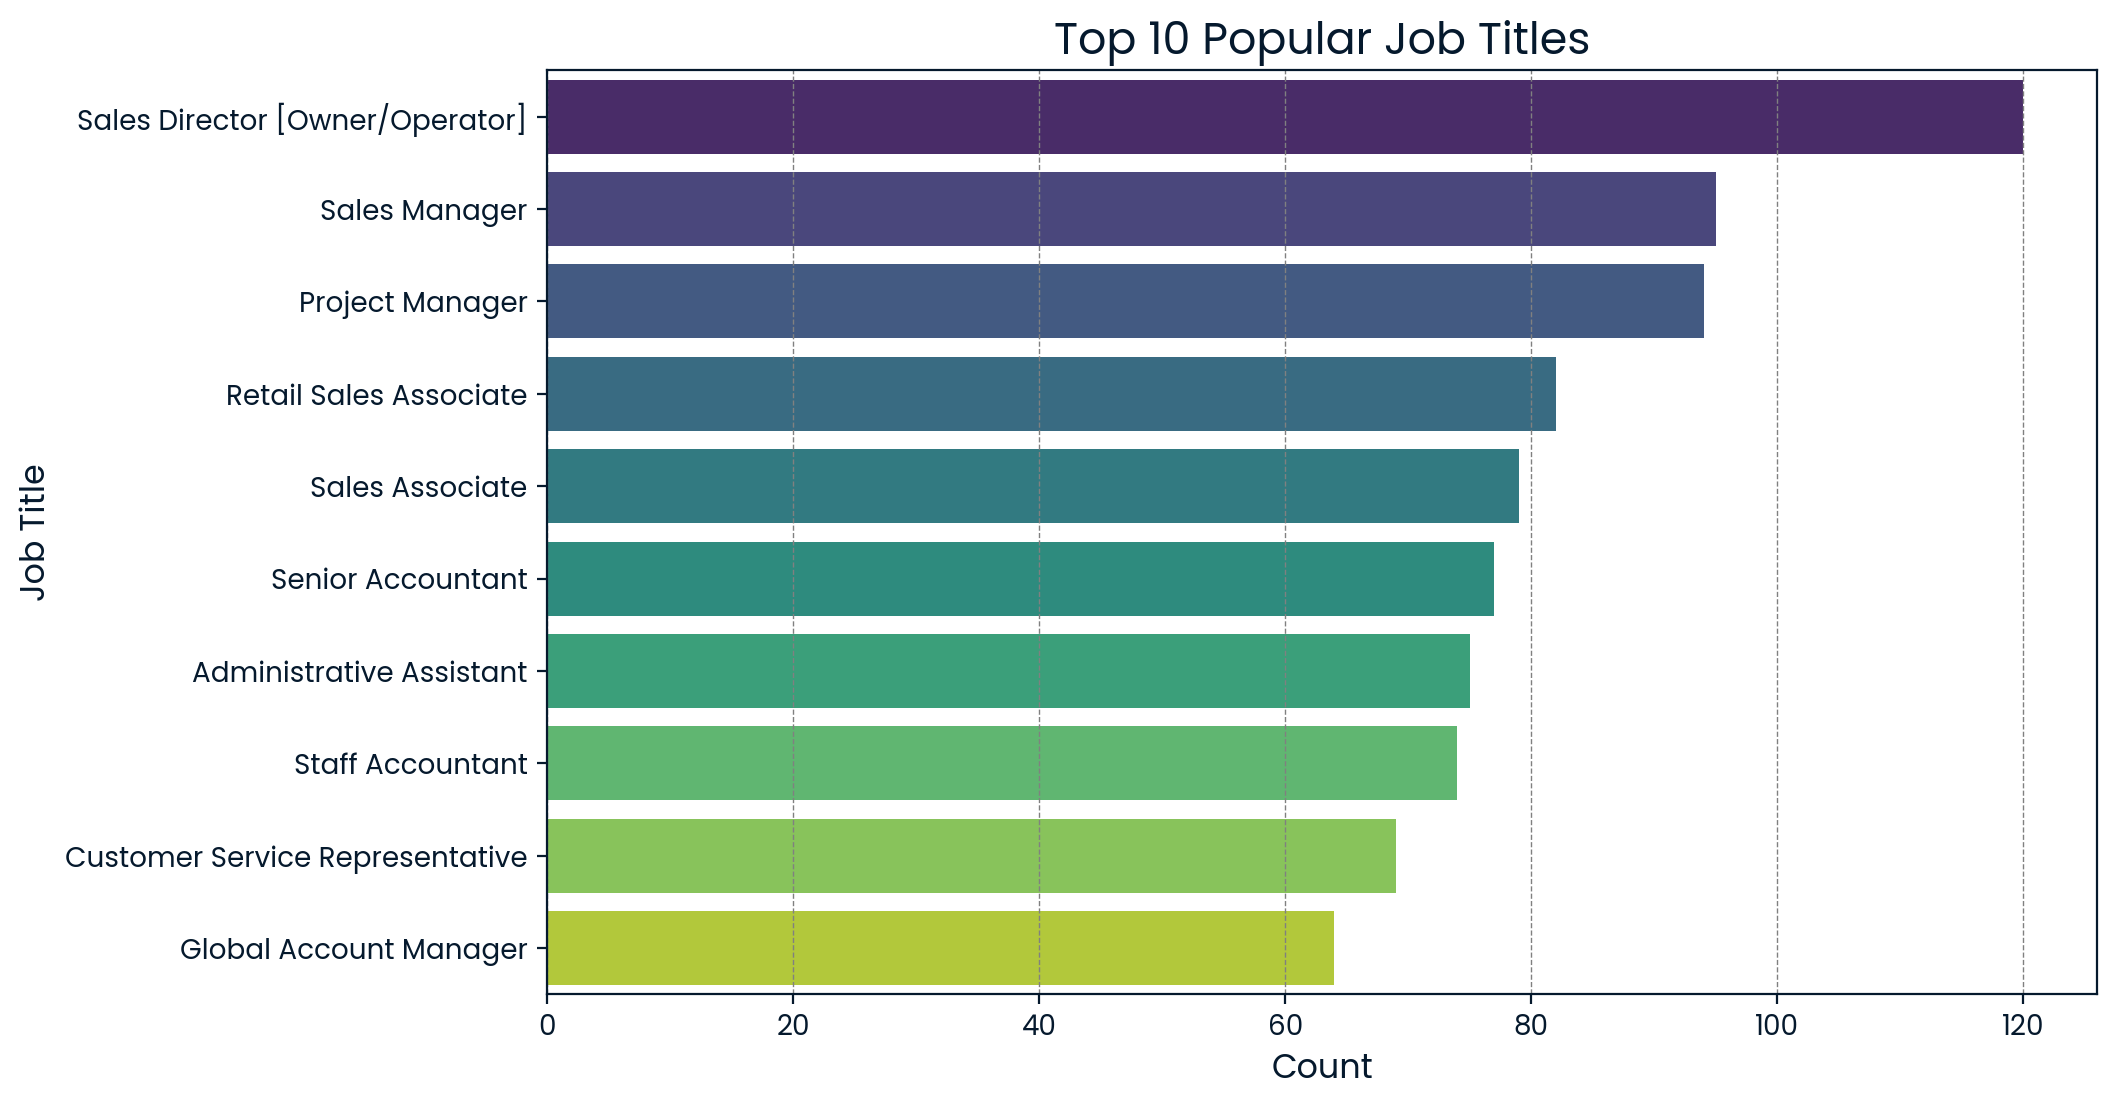

In [22]:
top10_titles = database_aggregated['title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_titles.values, y=top10_titles.index, palette='viridis')
plt.title('Top 10 Popular Job Titles', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.grid(True, which="both", axis='x', ls="--", lw=0.5, c="gray")  # Add grid lines
plt.show()

Wondering what was the highest compensated listing? The answer is - Quantitative Developer at Goliath Partners, based in Chicago, IL. The salary listed claimed up to **1,300,000 USD per year**! Listings from the **top 5 paid** list are all **tech jobs**, starting from $150,000 a year as a minimum.

The **full-time** position is listed in more than **4/5 of all postings**. One in ten jobs presumes contract-based, one in fifteen is part-time, and only a fraction of listings represent temporary jobs, internships, and voluntary positions.

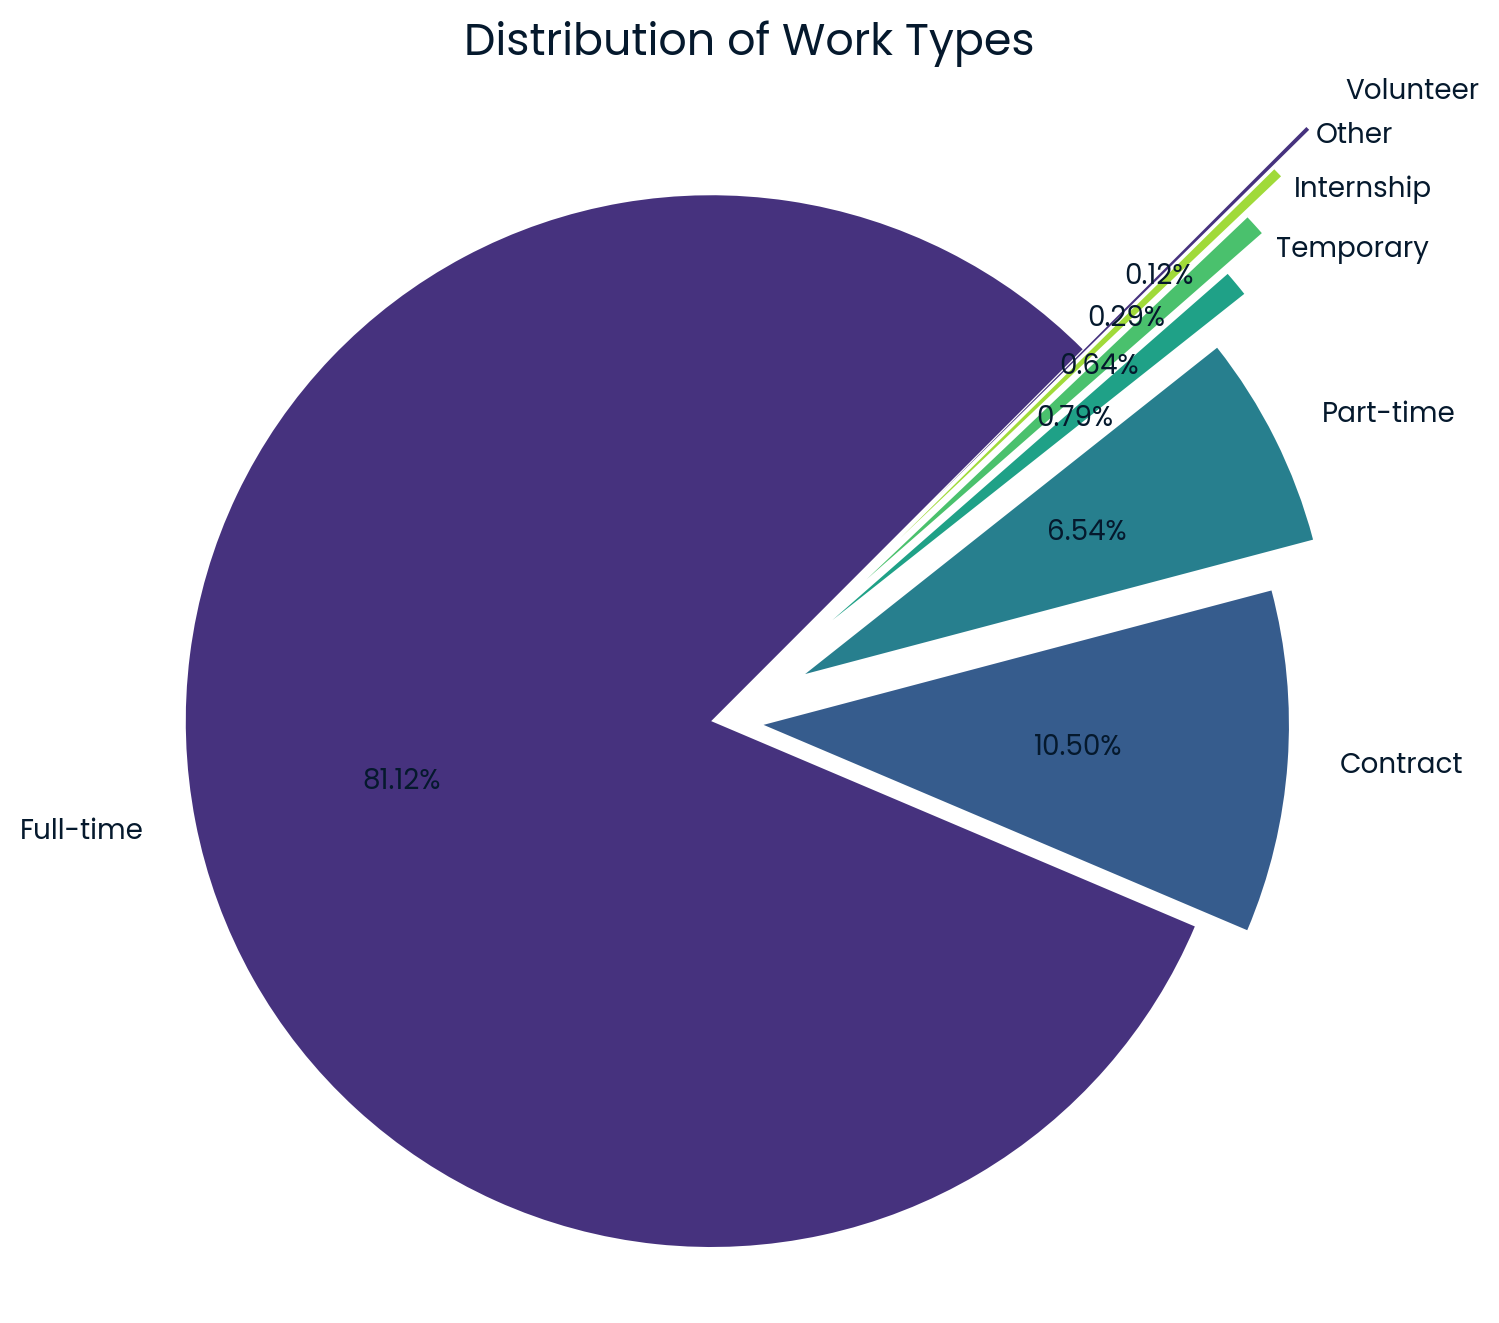

In [23]:
work_type_counts = database_aggregated['formatted_work_type'].value_counts(normalize=True)

# Set the Seaborn style
palette_color = sns.color_palette("viridis")
# declaring exploding pie 
explode = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(work_type_counts, labels=work_type_counts.index, explode=explode, colors=palette_color, autopct='%1.2f%%', startangle=45)
plt.title('Distribution of Work Types', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

About 2,100 jobs from our database are located in the entire United States. Technically, this should be the most popular location. However, it's not uncommon for remote jobs to have a broad geographical area where employers are hiring people. Narrowing down to cities, this is our top 10 job locations:

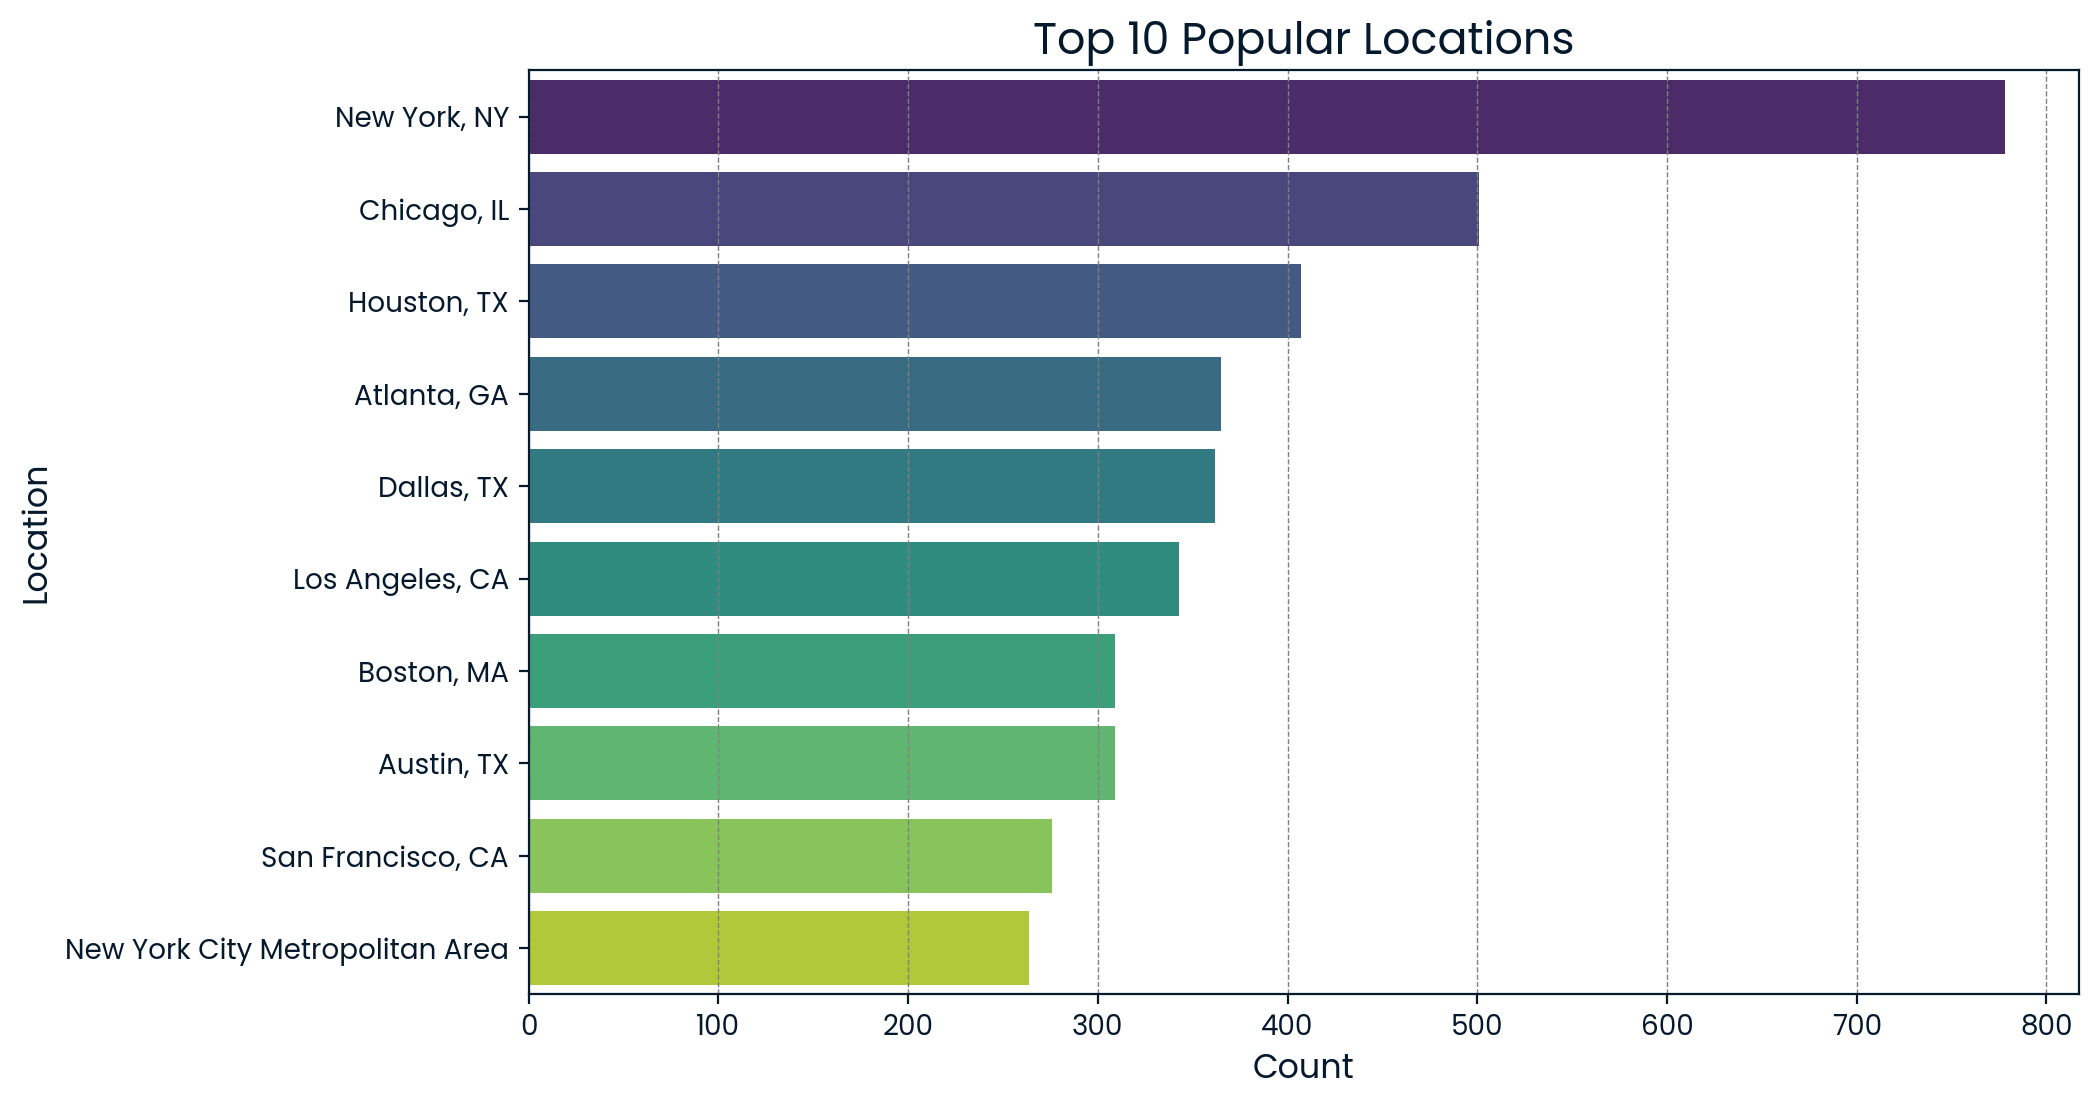

In [24]:
top10_locations = database_aggregated['location'].value_counts().head(11)
top10_locations_notus = top10_locations.iloc[1:]
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_locations_notus.values, y=top10_locations_notus.index, palette='viridis')
plt.title('Top 10 Popular Locations', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.grid(True, which="both", axis='x', ls="--", lw=0.5, c="gray")  # Add grid lines
plt.show()

Not surprisingly, the biggest city in the US has the biggest number of unfulfilled jobs, followed by Chicago and Houston. Moreover, 264 jobs are located in **New York City Metropolitan Area** (including suburbs), giving **1,042 jobs in total**.

The **number of applications each posting received** via LinkedIn is distributed unequally. Ranged **from 0 to 1,615**, the 25th percentile is only 2 applications per job posting. The **median value is 3**, and the 75th percentile is 8 applications.

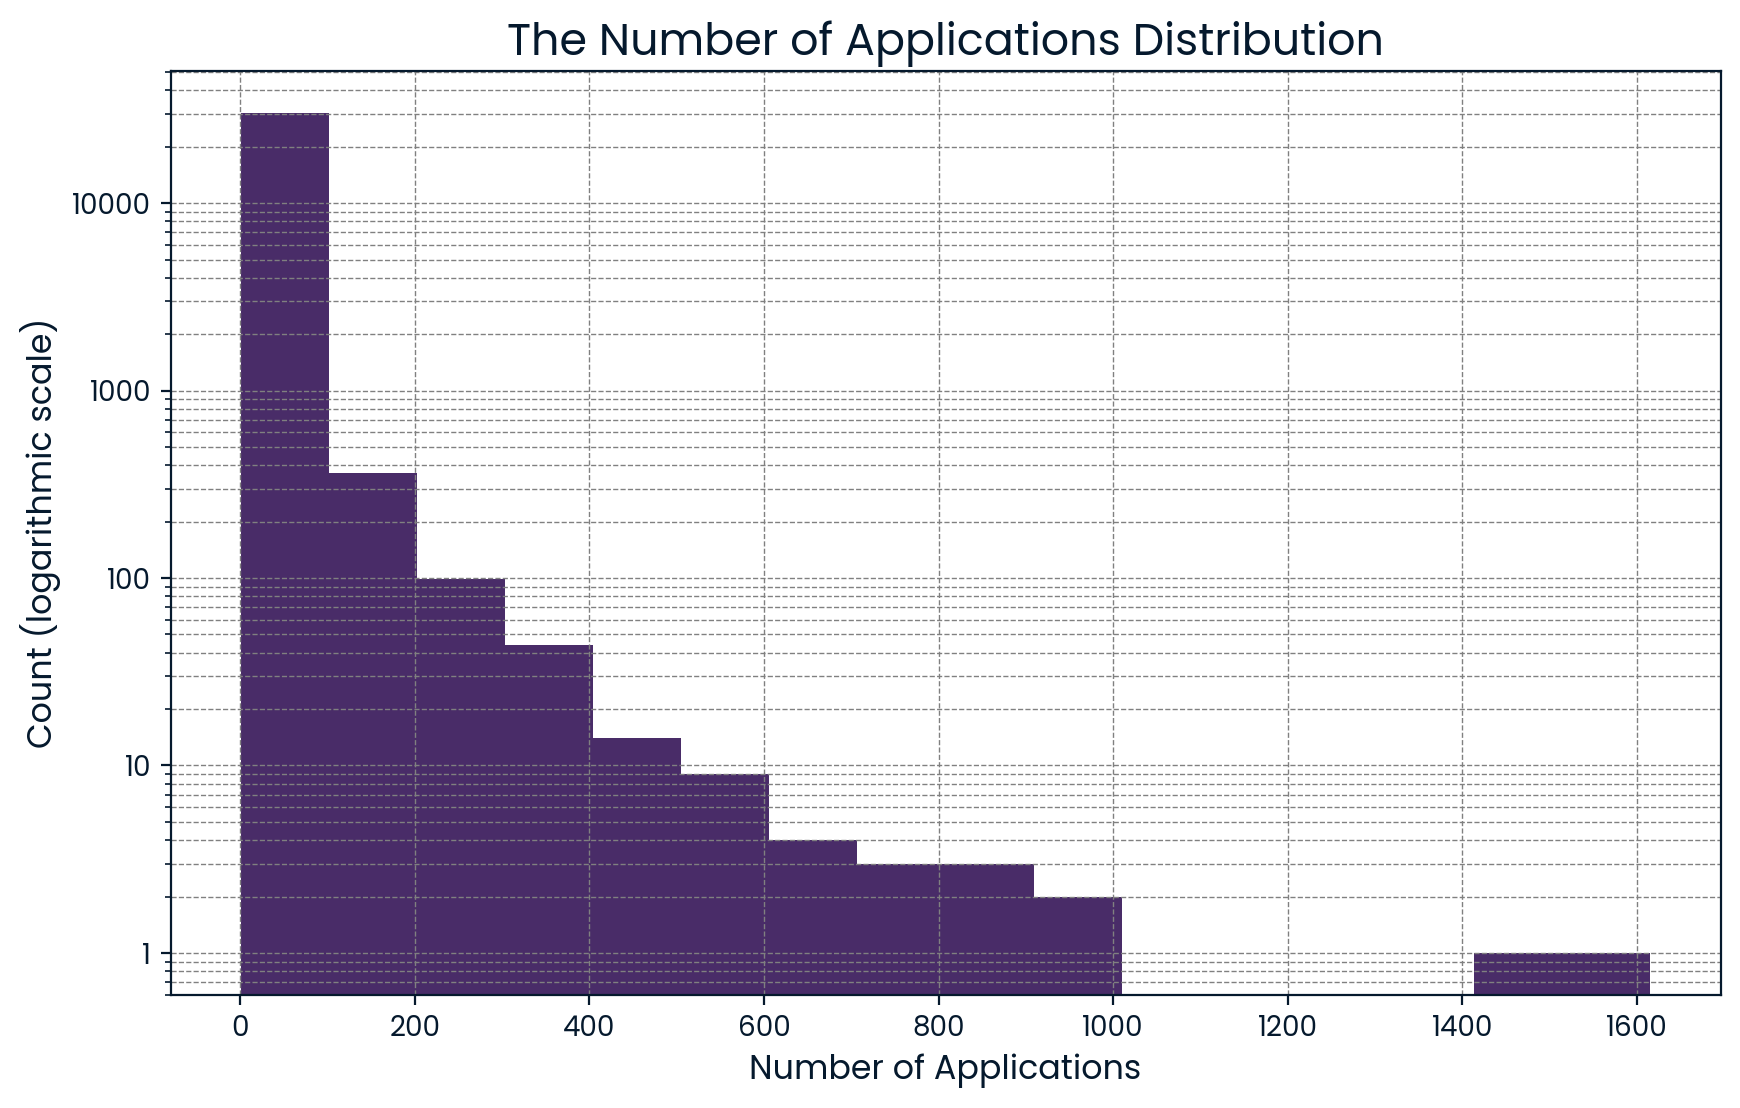

In [25]:
# Filter out rows where 'applies' is zero
non_zero_counts = database_aggregated[database_aggregated['applies'] > 0]

# Create the histogram with logarithmic scale for the count axis using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(non_zero_counts['applies'], bins=16, color='#492C68', log=True)
plt.title('The Number of Applications Distribution', fontsize=16)
plt.xlabel('Number of Applications', fontsize=12)
plt.ylabel('Count (logarithmic scale)', fontsize=12)
plt.grid(True, which="both", ls="--", lw=0.5, c="gray")  # Add grid lines
plt.yticks([1, 10, 100, 1000, 10000], ['1', '10', '100', '1000', '10000'])
plt.show()

How the number of applications is associated with salaries, industries, company size, etc. is covered more in detail in the chapter _What contributes to more applicants?_.

The average number of times a job posting on LinkedIn has been viewed is about 47, whereas the median value (50th percentile) is only 9. Some listings have been viewed a staggering 5 thousand times!

Analyzing the process of applying to a job, almost 1/3 required a complex application directly on a company's website (usually involves answering many questions, submitting a CV, cover letter, etc.). Only 6.45% of jobs required a simple application procedure on a company's website, and the rest **61.82% didn't involve any website**, at all.

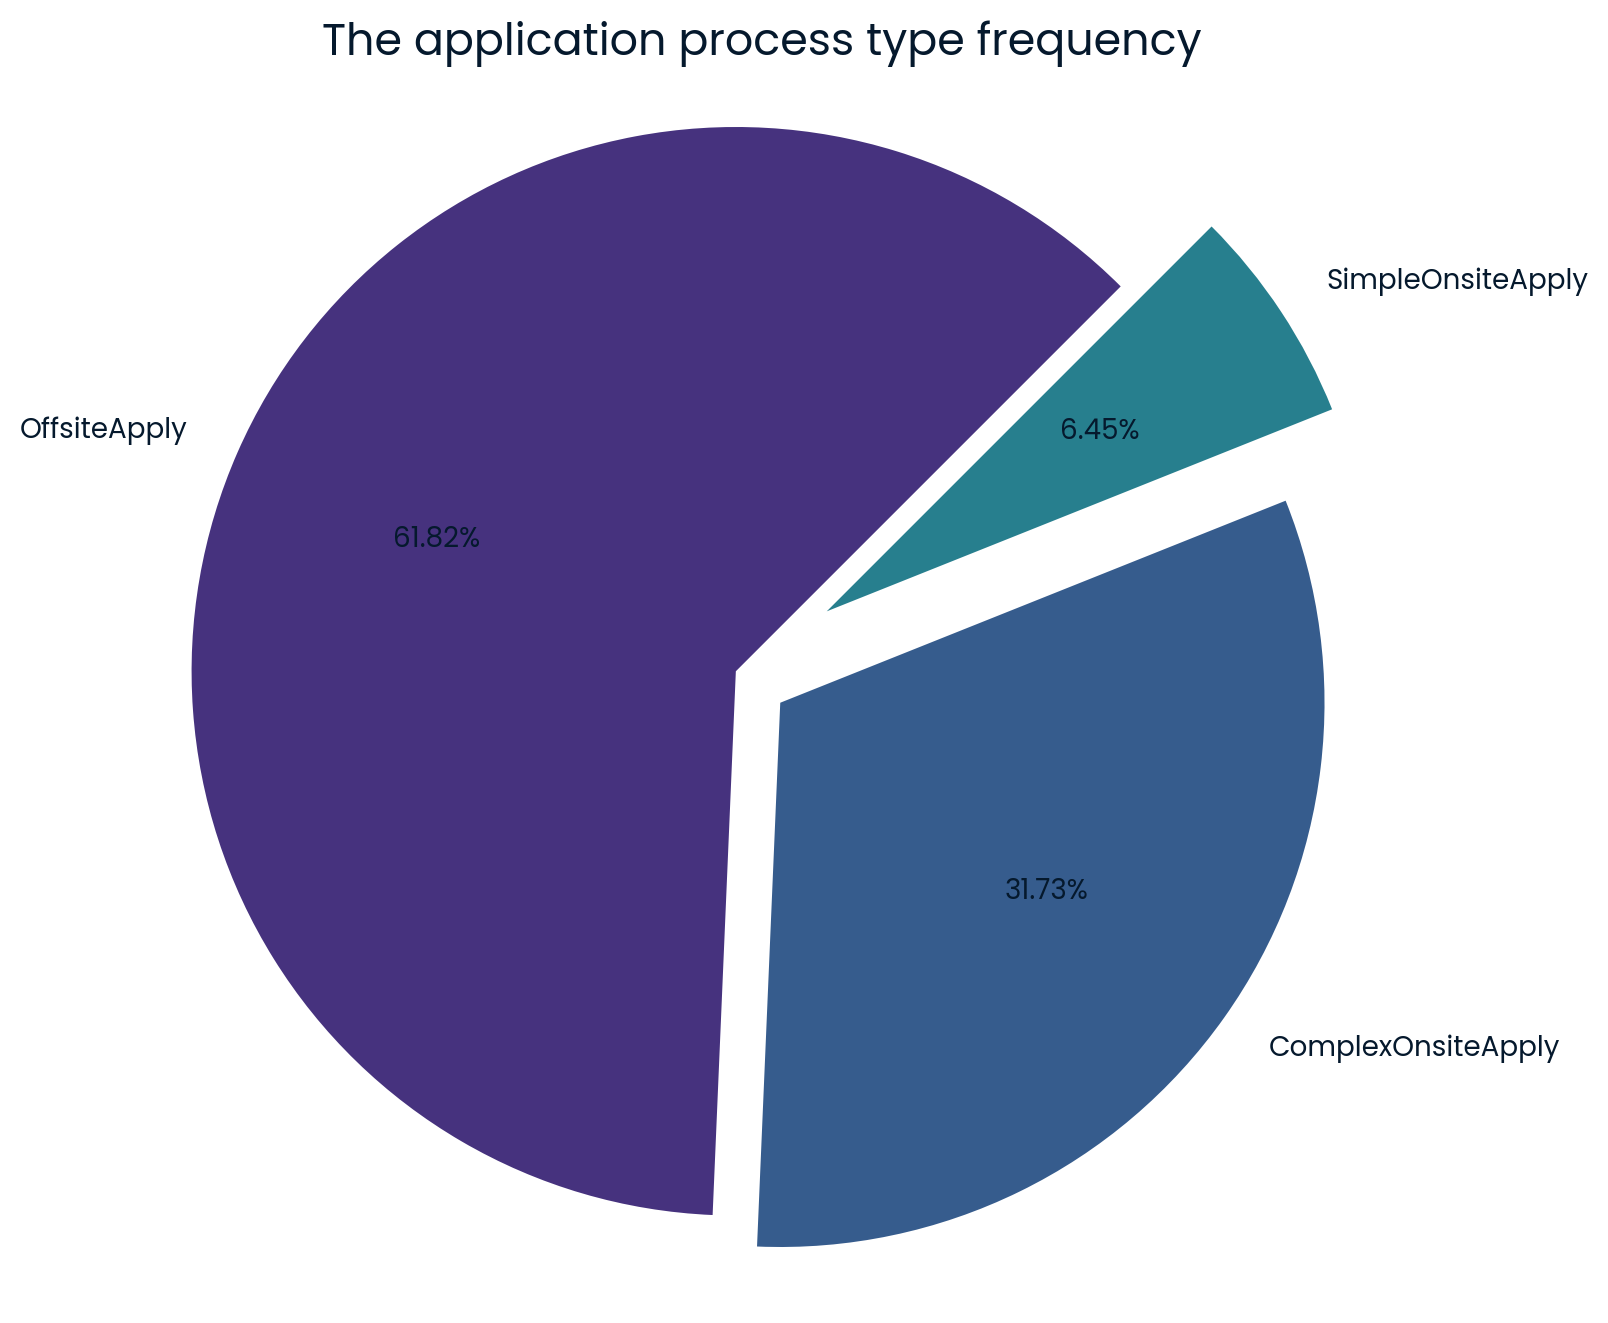

In [26]:
application_type_counts = database_aggregated['application_type'].value_counts(normalize=True)

# Set the Seaborn style
palette_color = sns.color_palette("viridis")
# declaring exploding pie 
explode = [0, 0.1, 0.2]

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(application_type_counts, labels=application_type_counts.index, explode=explode, colors=palette_color, autopct='%1.2f%%', startangle=45)
plt.title('The application process type frequency', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Interesting facts can be inferred from the following chart showing the popularity of different **experience levels**. Even having a quarter of the data with experience level not specified, in general, _there are more jobs for people with some relevant experience or abundance of experience, than for fresh graduates or career changers_.

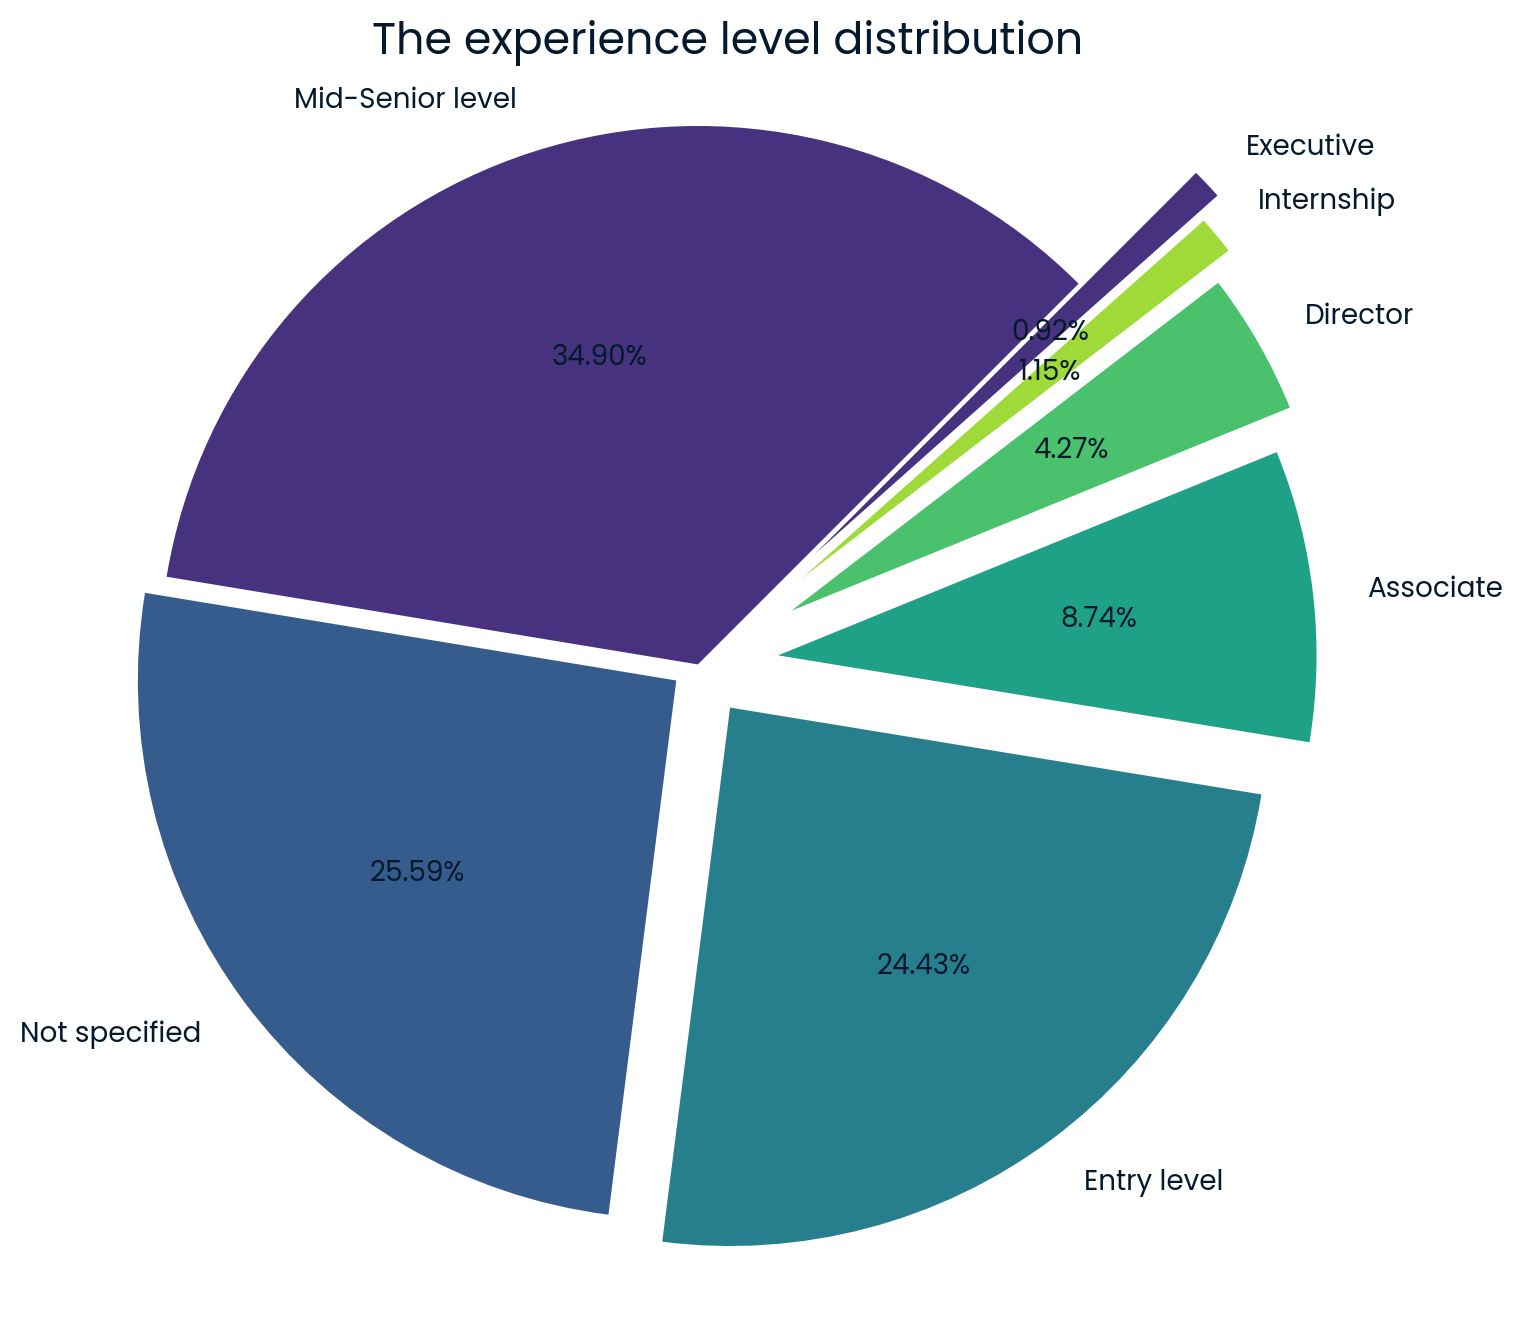

In [27]:
experience_level_counts = database_aggregated['formatted_experience_level'].value_counts(normalize=True)

# Set the Seaborn style
palette_color = sns.color_palette("viridis")
# declaring exploding pie 
explode = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(experience_level_counts, labels=experience_level_counts.index, explode=explode, colors=palette_color, autopct='%1.2f%%', startangle=45)
plt.title('The experience level distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Switching focus to industries, there are over 3,000 listings associated with **Hospitals and Health Care**, which makes it the most popular industry. The **IT services and IT Consulting** is our runner-up of unfulfilled jobs popularity, followed by Staffing and Recruiting, Retail and Financial Services.

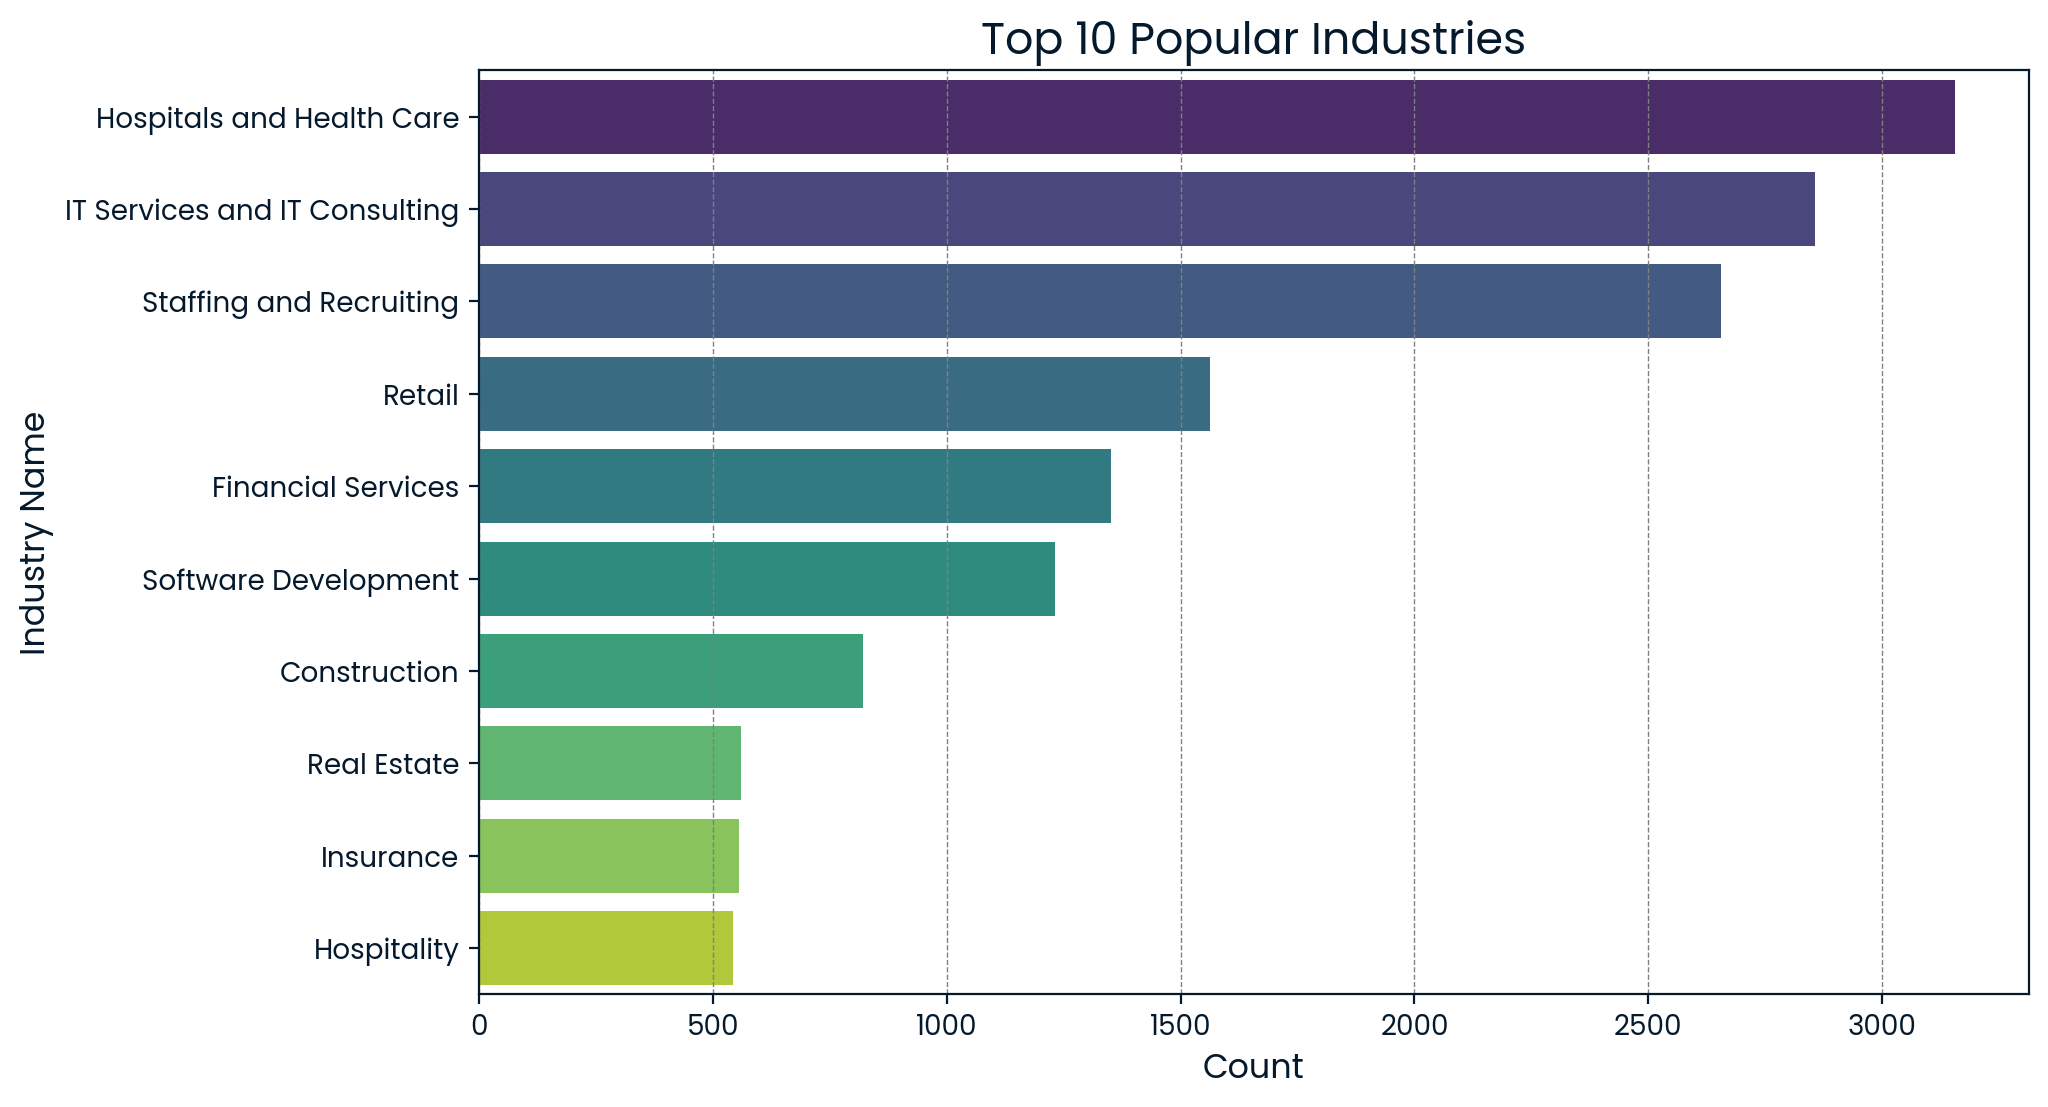

In [28]:
top10_industries = database_aggregated['industry_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_industries.values, y=top10_industries.index, palette='viridis')
plt.title('Top 10 Popular Industries', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Industry Name', fontsize=12)
plt.grid(True, which="both", axis='x', ls="--", lw=0.5, c="gray")  # Add grid lines
plt.show()

Did big or small companies post more jobs? **The largest companies** and corporations have the largest share of all job postings - **over 30%**, followed by medium-sized companies. Companies with 50 employees or less account for a mere 11% of all jobs posted.

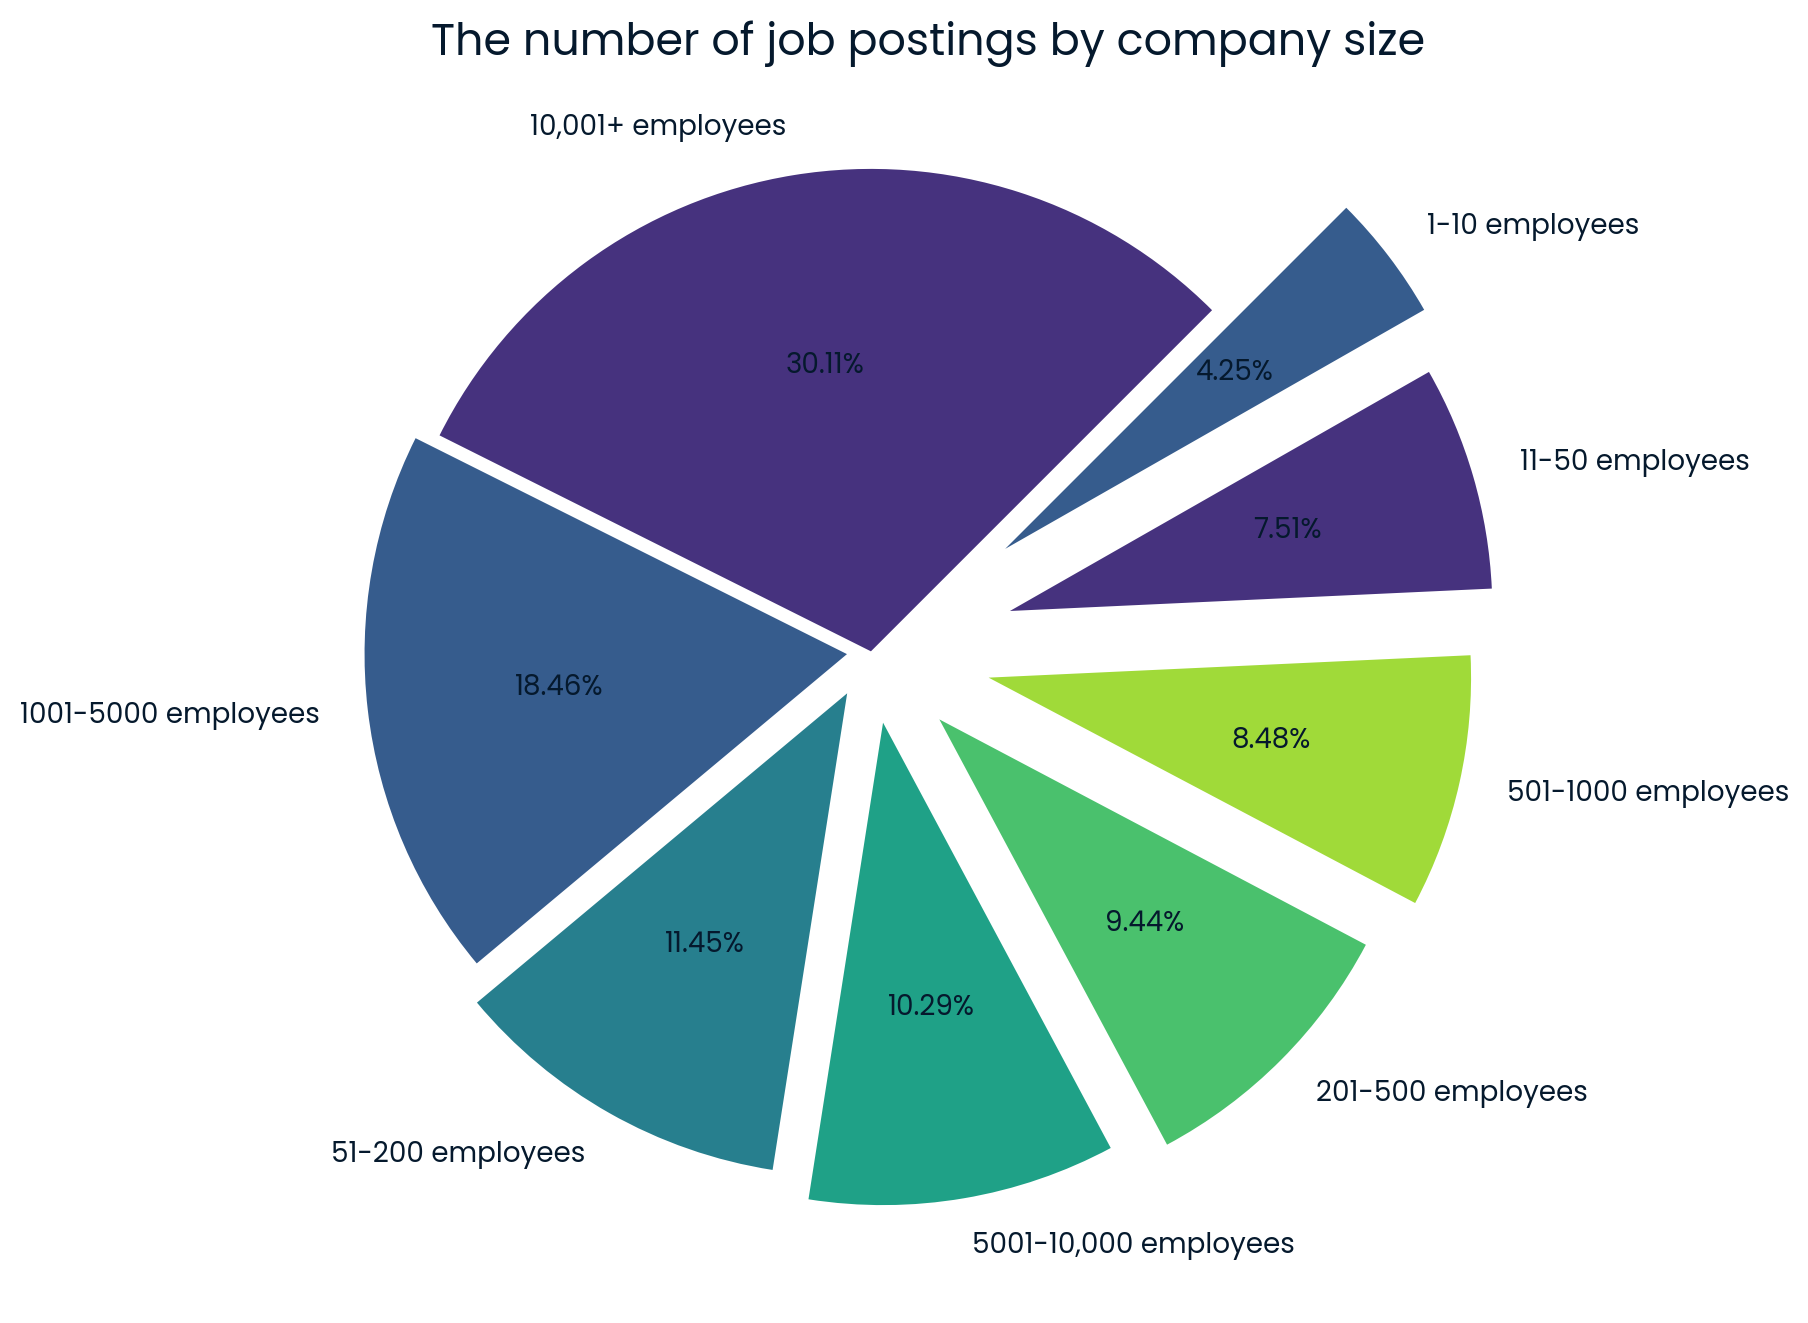

In [29]:
company_size_counts = database_aggregated['company_size'].value_counts(normalize=True)
company_size_description = {
    0: '1-10 employees',
    1: '11-50 employees',
    2: '51-200 employees',
    3: '201-500 employees',
    4: '501-1000 employees',
    5: '1001-5000 employees',
    6: '5001-10,000 employees',
    7: '10,001+ employees'
}

# Map the values in company_size_counts index to their corresponding descriptions
company_size_counts.index = company_size_counts.index.map(company_size_description)

company_size_counts = company_size_counts.reset_index()
company_size_counts.columns = ['description', 'count']

# Set the Seaborn style
palette_color = sns.color_palette("viridis")
# declaring exploding pie 
explode = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(company_size_counts['count'], labels=company_size_counts['description'], explode=explode, colors=palette_color, autopct='%1.2f%%', startangle=45)
plt.title('The number of job postings by company size', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Salary insights

### Which occupations are best paid?

Every job posting is associated with a certain kind of occupation. After I spent some time exploring data in terms of salaries, I calculated the average compensation for each occupation. Sorted from the highest to lowest, that's how the results look like:

In [30]:
# The average hourly salary based on skills
database_aggregated_hourly = database_aggregated.query('pay_period_x=="HOURLY"')

skill_mean_salary_h = database_aggregated_hourly.groupby('skill_abr')['med_salary_x'].mean().reset_index()
skill_mean_salary_h.rename(columns={'med_salary_x': 'med_salary_hourly'}, inplace=True)

skill_count_salary_h = database_aggregated_hourly.groupby('skill_abr')['med_salary_x'].count().reset_index()
skill_count_salary_h.rename(columns={'med_salary_x': 'count_hourly'}, inplace=True)
    
# The average weekly salary based on skills
database_aggregated_weekly = database_aggregated.query('pay_period_x=="WEEKLY"')

skill_mean_salary_w = database_aggregated_weekly.groupby('skill_abr')['med_salary_x'].mean().reset_index()
skill_mean_salary_w.rename(columns={'med_salary_x': 'med_salary_weekly'}, inplace=True)

skill_count_salary_w = database_aggregated_weekly.groupby('skill_abr')['med_salary_x'].count().reset_index()
skill_count_salary_w.rename(columns={'med_salary_x': 'count_weekly'}, inplace=True)
    
# The average monthly salary based on skills
database_aggregated_monthly = database_aggregated.query('pay_period_x=="MONTHLY"')

skill_mean_salary_m = database_aggregated_monthly.groupby('skill_abr')['med_salary_x'].mean().reset_index()
skill_mean_salary_m.rename(columns={'med_salary_x': 'med_salary_monthly'}, inplace=True)

skill_count_salary_m = database_aggregated_monthly.groupby('skill_abr')['med_salary_x'].count().reset_index()
skill_count_salary_m.rename(columns={'med_salary_x': 'count_monthly'}, inplace=True)

# The average yearly salary based on skills
database_aggregated_yearly = database_aggregated.query('pay_period_x=="YEARLY"')

skill_mean_salary_y = database_aggregated_yearly.groupby('skill_abr')['med_salary_x'].mean().reset_index()
skill_mean_salary_y.rename(columns={'med_salary_x': 'med_salary_yearly'}, inplace=True)

skill_count_salary_y = database_aggregated_yearly.groupby('skill_abr')['med_salary_x'].count().reset_index()
skill_count_salary_y.rename(columns={'med_salary_x': 'count_yearly'}, inplace=True)

# Merge all skill mean salaries and their correspondive counts, together will skill names
merged_data = skill_mean_salary_h.merge(skill_count_salary_h, on='skill_abr', how='left').merge(skill_mean_salary_w, on='skill_abr', how='left').merge(skill_count_salary_w, on='skill_abr', how='left').merge(skill_mean_salary_m, on='skill_abr', how='left').merge(skill_count_salary_m, on='skill_abr', how='left').merge(skill_mean_salary_y, on='skill_abr', how='left').merge(skill_count_salary_y, on='skill_abr', how='left').merge(skills, on='skill_abr', how='left')
indexnone = merged_data[merged_data['skill_abr']=='NONE'].index
merged_data.drop(indexnone, inplace=True)
merged_data.fillna(0, inplace=True)


#Add a new column with a total count
merged_data['total_count'] = merged_data['count_hourly'] + merged_data['count_weekly'] + merged_data['count_monthly'] + merged_data['count_yearly']

#Add a new column with an overall mean salary weighted
merged_data['med_salary_overall'] = round(((merged_data['med_salary_hourly']*40*52) * merged_data['count_hourly'] + (merged_data['med_salary_weekly']*52) * merged_data['count_weekly'] + (merged_data['med_salary_monthly']*12) * merged_data['count_monthly'] + merged_data['med_salary_yearly'] * merged_data['count_yearly']) / merged_data['total_count'],2)

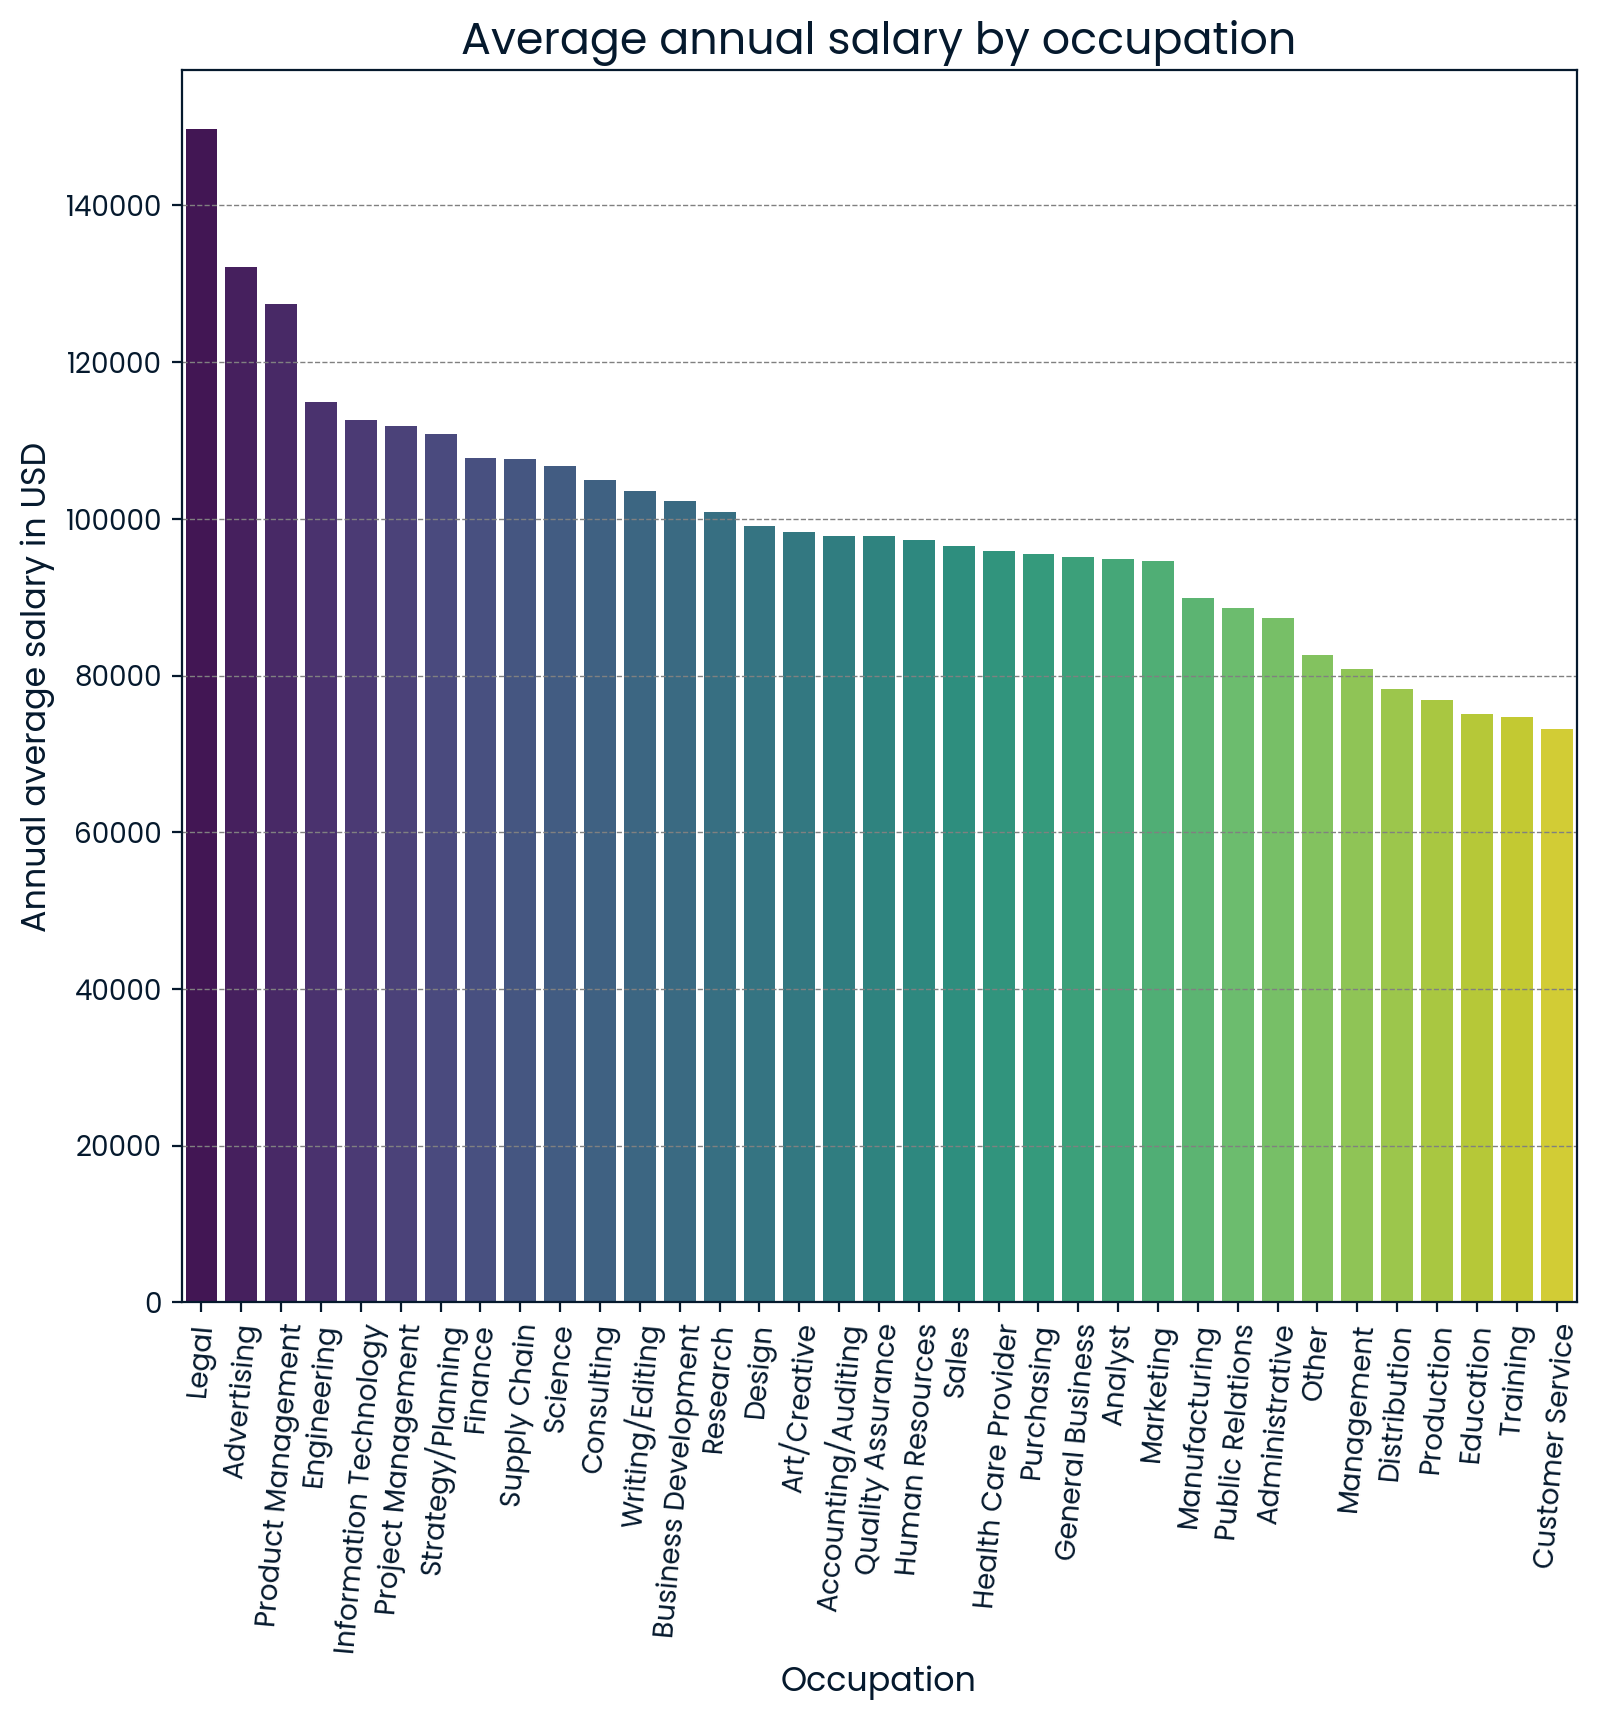

In [31]:
mean_salaries_sorted = merged_data.sort_values('med_salary_overall', ascending=False)

plt.figure(figsize=(9, 8))
sns.barplot(x='skill_name', y='med_salary_overall', data=mean_salaries_sorted, palette='viridis')
plt.title('Average annual salary by occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.xticks(rotation=85)
plt.ylabel('Annual average salary in USD', fontsize=12)
plt.grid(True, which="both", axis='y', ls="--", lw=0.5, c="gray")  # Add grid lines
plt.show()

On average, **legal professionals** are promised to be compensated 140,000 USD or more, based on job postings analyzed. Advertising, Product Management, Engineering, IT, Project Management, Strategy/Planning, Finance, Supply Chain, Science, Consulting, Writing/Editing, Business Development, and Research - an average professional with an average level of expertise can expect to make 6 figures a year in occupations mentioned.    
People who work in Customer Service, Training, and Education, are expected to be paid as low as about 70,000 USD per year.

Let's take a look at the general distribution of compensation in each occupation. On the chart below, the whiskers show 99% of data points for each occupation. Rectangles represent the data between the 25th and 75th percentile, known as the interquartile range. The top 1% of salaries (outliers) appear as circles.

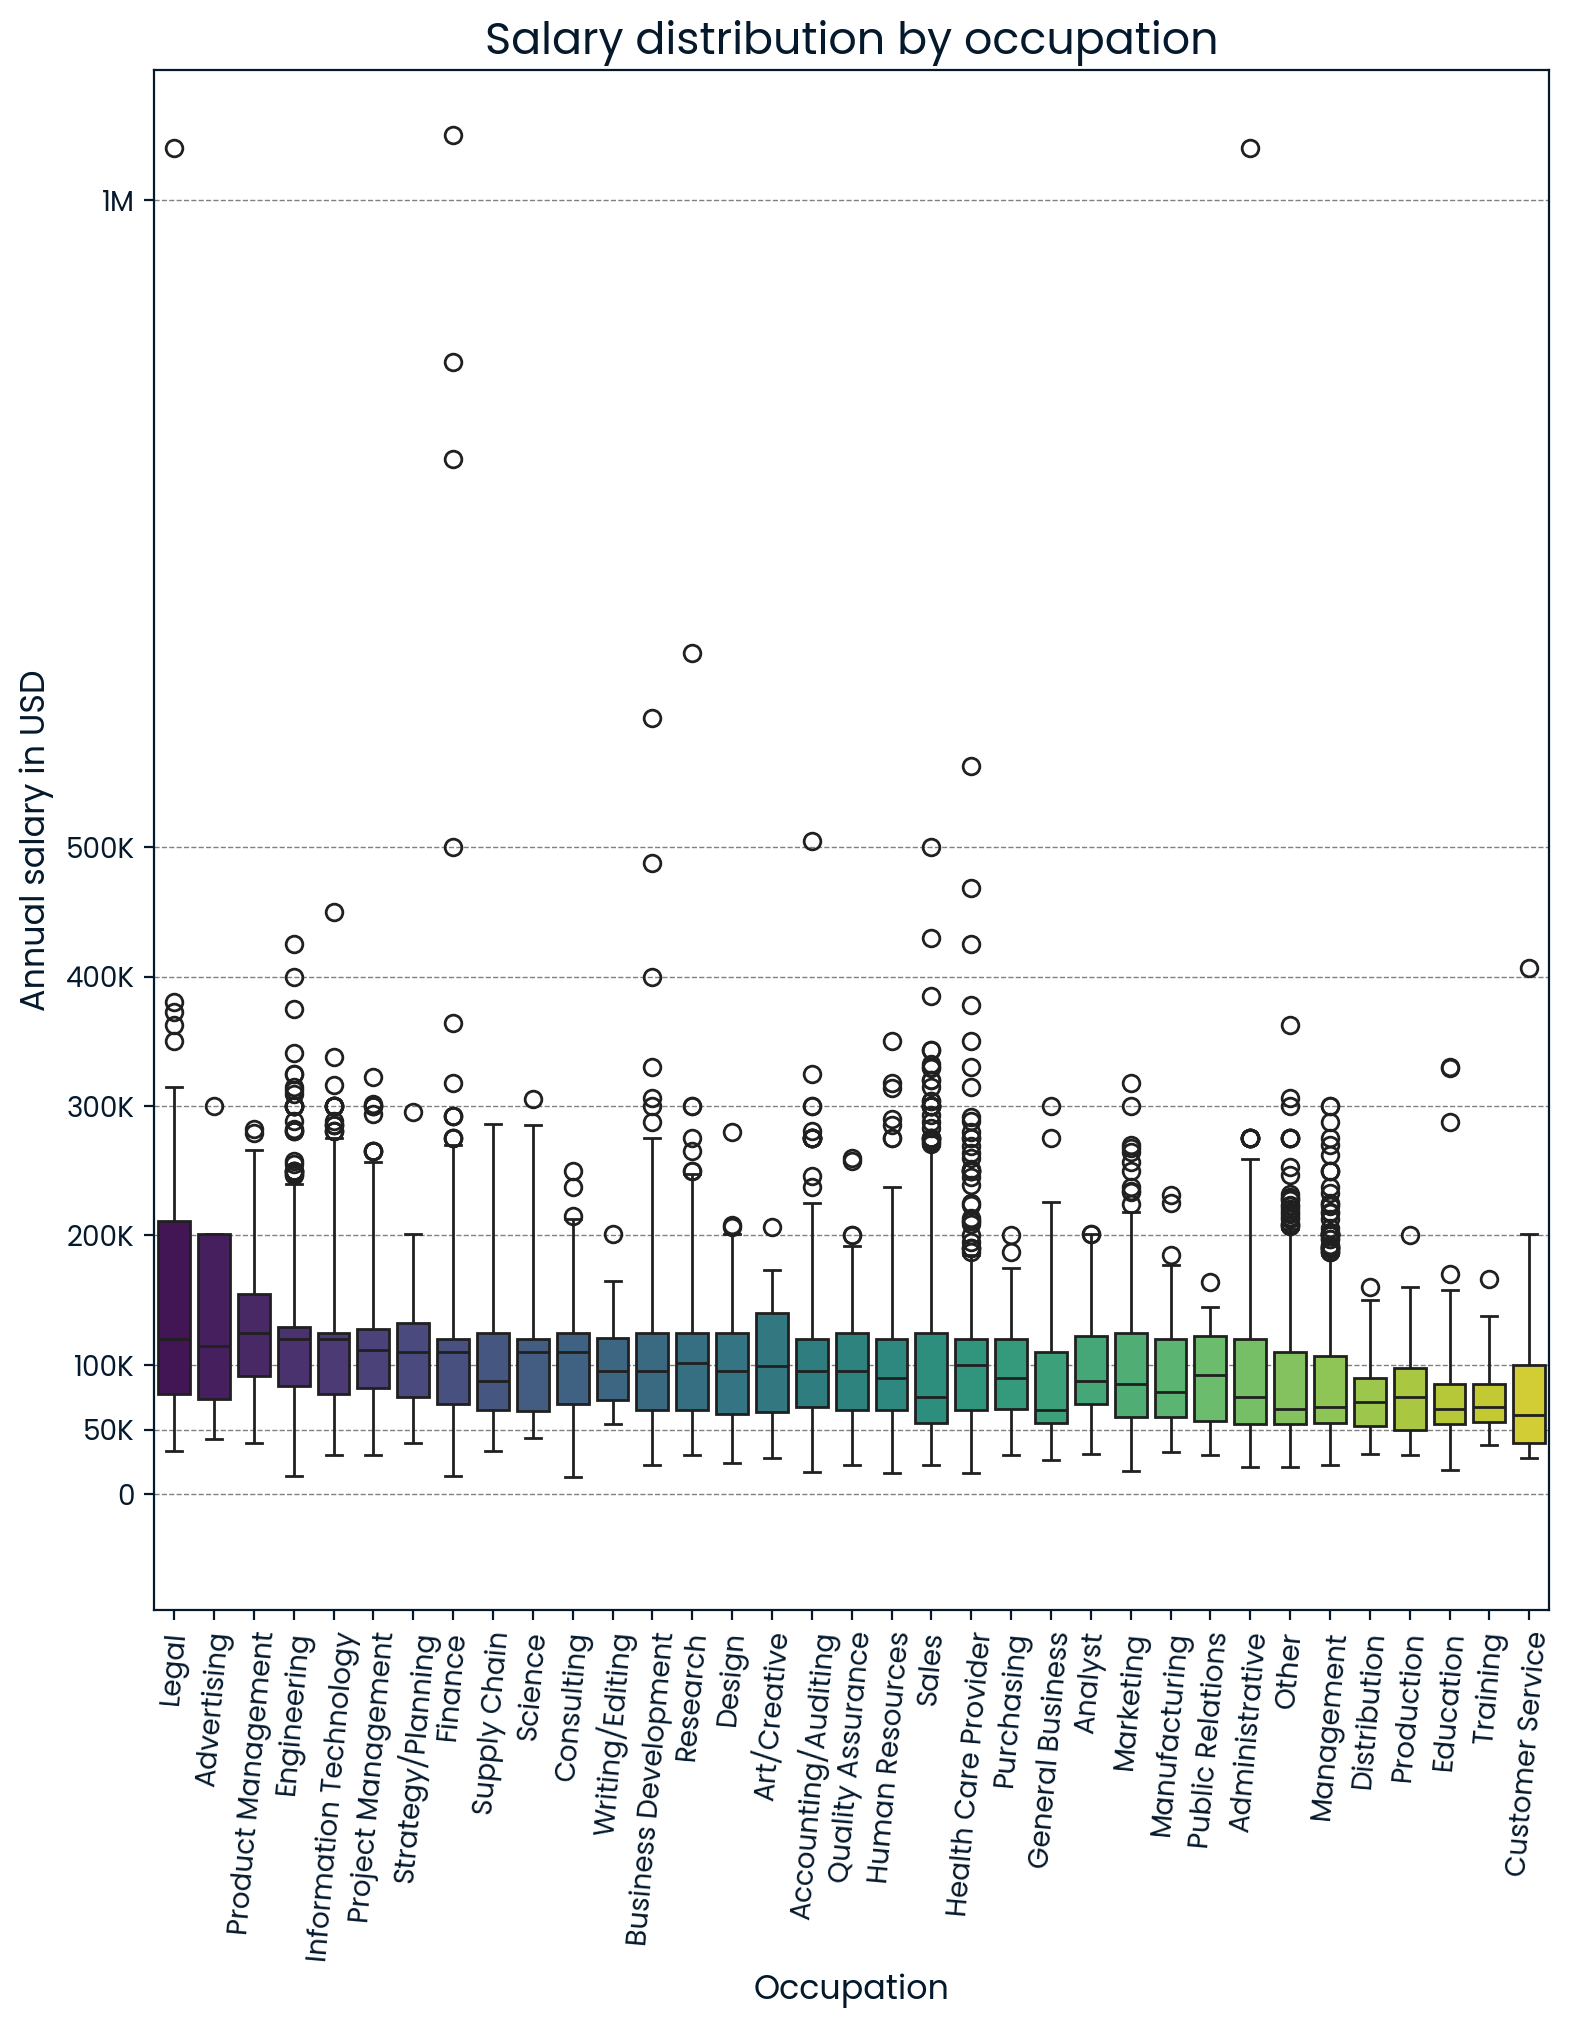

In [32]:
#Get the skills description
unified_med_salary_skill = database_aggregated.merge(skills, on='skill_abr', how='left')

skill_name_sorted = ['Legal', 'Advertising', 'Product Management', 'Engineering', 'Information Technology', 'Project Management', 'Strategy/Planning', 'Finance', 'Supply Chain', 'Science', 'Consulting', 'Writing/Editing', 'Business Development', 'Research', 'Design', 'Art/Creative', 'Accounting/Auditing', 'Quality Assurance', 'Human Resources', 'Sales', 'Health Care Provider', 'Purchasing', 'General Business', 'Analyst', 'Marketing', 'Manufacturing', 'Public Relations', 'Administrative', 'Other', 'Management', 'Distribution', 'Production', 'Education', 'Training', 'Customer Service']

# Define the custom order as a categorical data type
custom_order = pd.CategoricalDtype(categories=skill_name_sorted, ordered=True)

# Convert the 'skill_name' column to the categorical data type with the custom order
unified_med_salary_skill['skill_name'] = unified_med_salary_skill['skill_name'].astype(custom_order)

# Sort the DataFrame by the 'skill_name' column
unified_med_salary_skill_sorted = unified_med_salary_skill.sort_values('skill_name')

plt.figure(figsize=(9, 10))
sns.boxplot(data=unified_med_salary_skill_sorted, x='skill_name', y='unified_med_salary', whis=(0,99), showfliers=True, palette='viridis')
plt.title('Salary distribution by occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.xticks(rotation=85)
plt.yticks([0, 50000, 100000, 200000, 300000, 400000, 500000, 1000000], ['0', '50K', '100K', '200K', '300K', '400K', '500K', '1M'])
plt.ylabel('Annual salary in USD', fontsize=12)
plt.ylim(top=1100000)
plt.grid(True, which="both", axis='y', ls="--", lw=0.5, c="gray")  # Add grid lines
plt.show()

The **Legal** and **Advertising** stand out here. Being the only two professions where the 75th percentile reaches 200,000 USD (meaning 25% of jobs offer 200K+ a year), they also have the widest interquartile range.    
12 out of 35 occupations have a median salary of 100K or more. You can expect to earn the least in Customer Service: most jobs pay slightly more than 50,000 USD per year.

### Which locations pay best?

If you don't know _where_ you should look for a job, the following boxplot might help you.

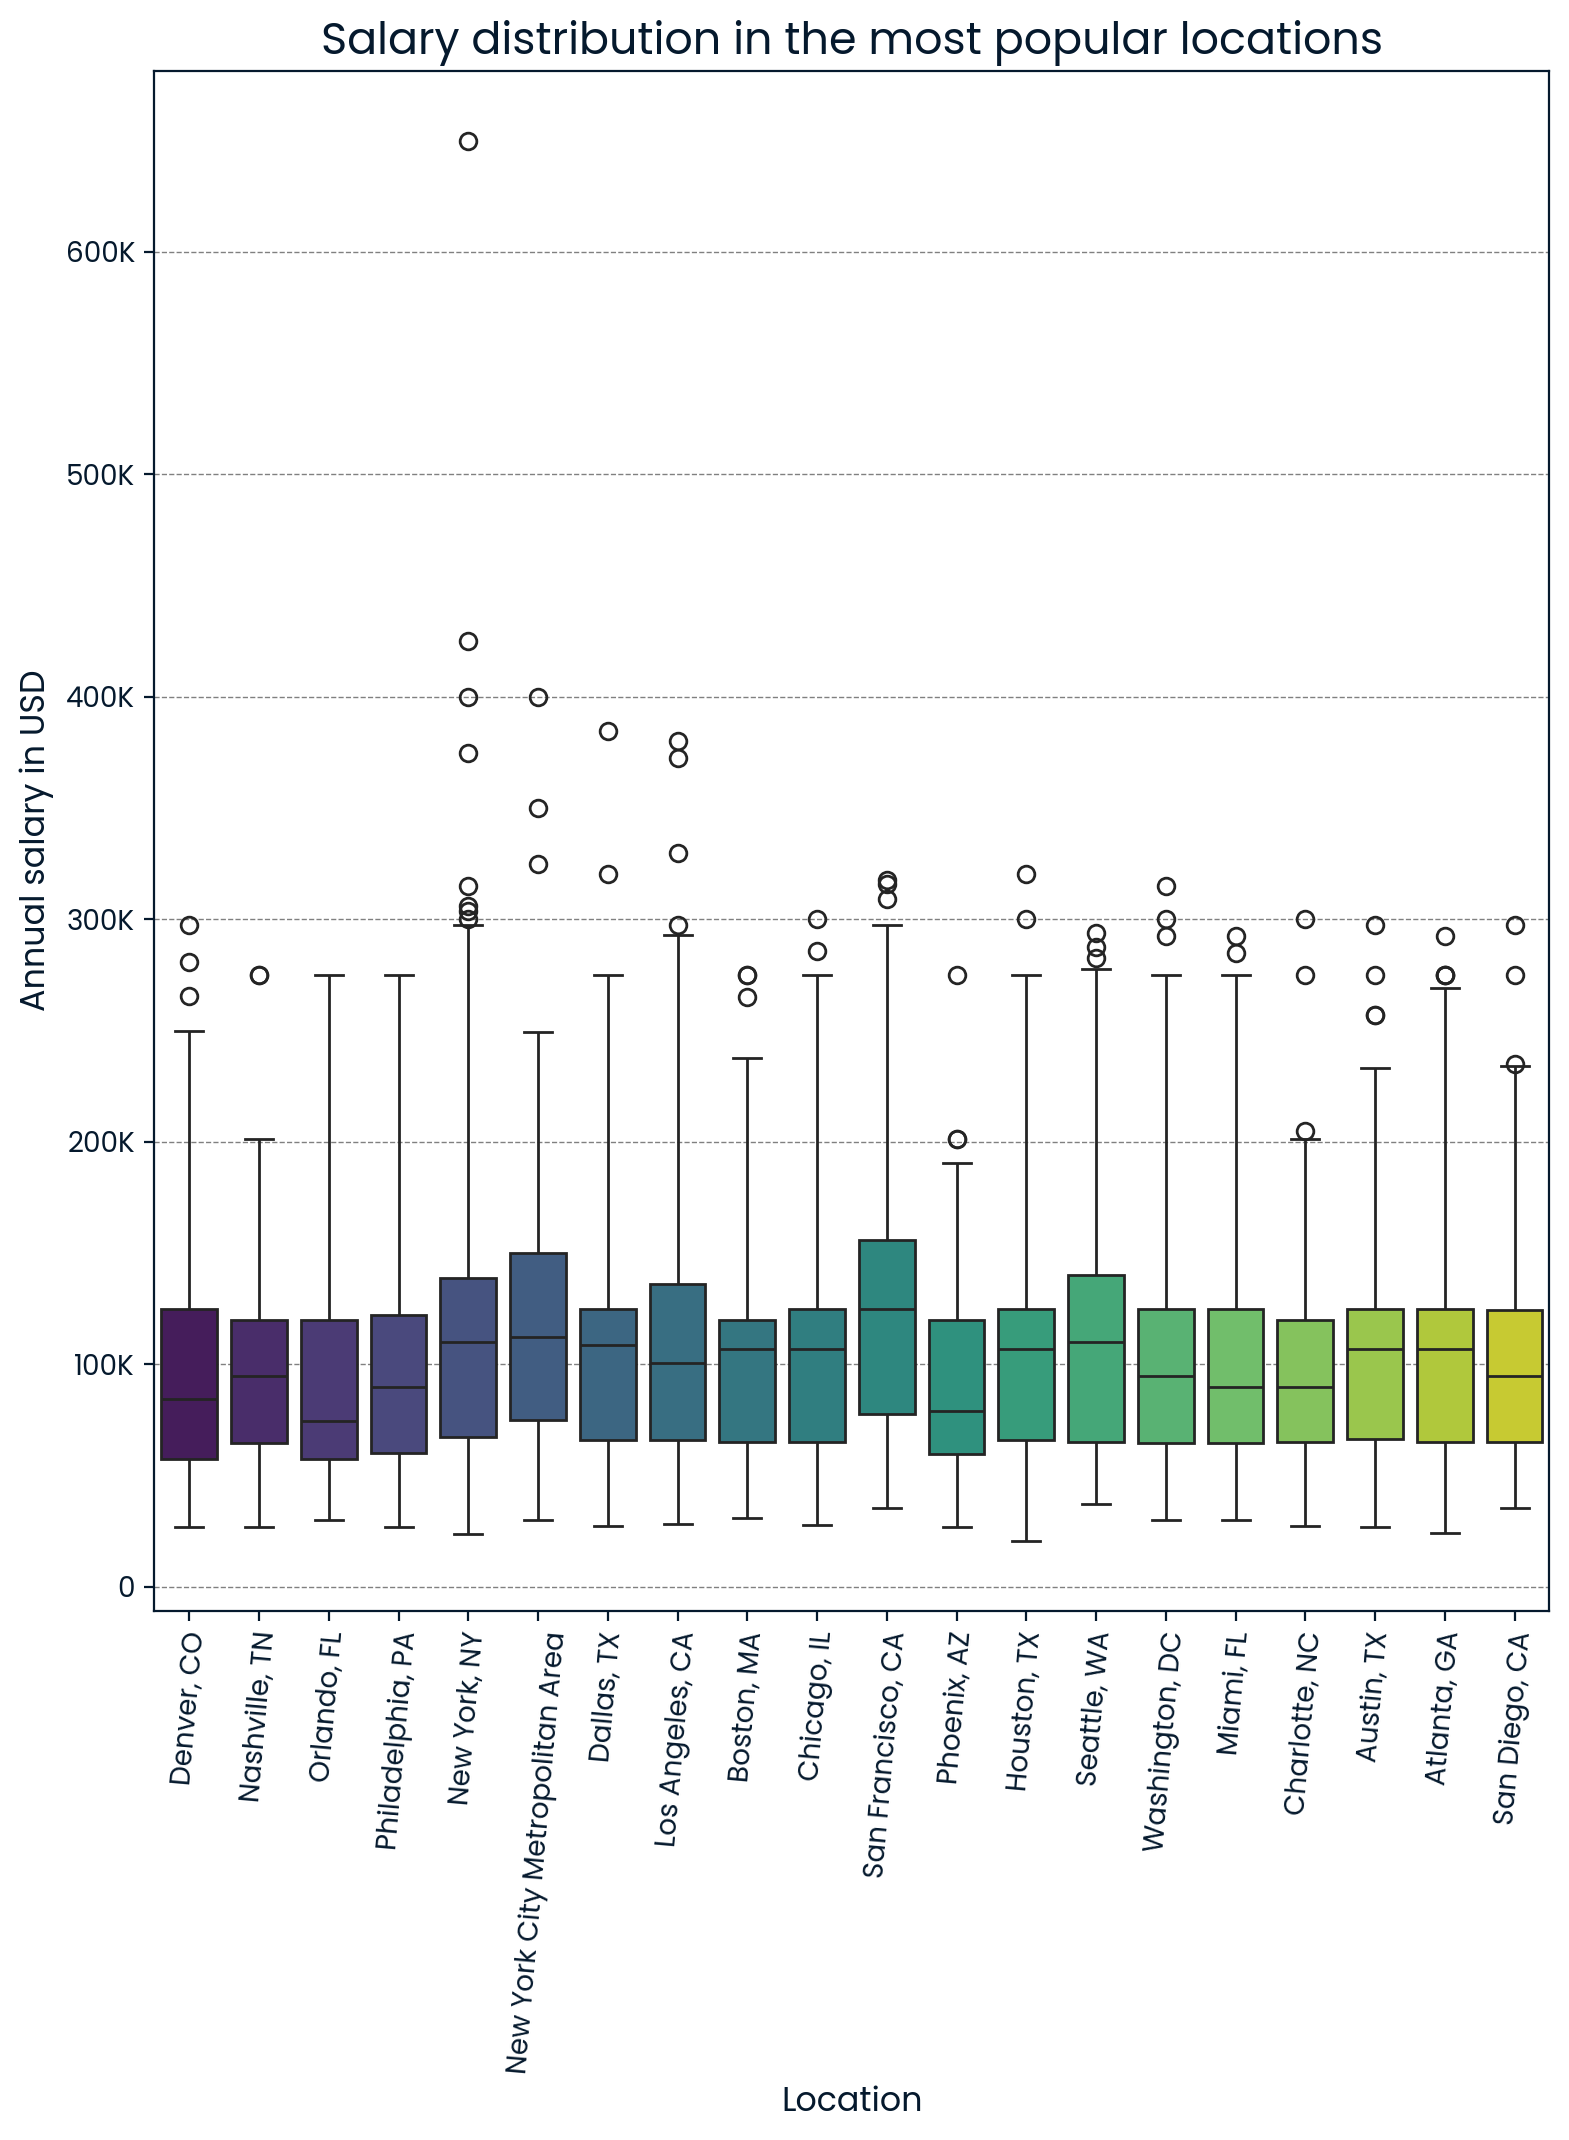

In [33]:
#Subset data to top 20 locaions
top20_locations = database_aggregated['location'].value_counts().head(21)
top20_locations_notus = top20_locations.iloc[1:]
filtered_data_locations = database_aggregated[database_aggregated['location'].isin(top20_locations_notus.index)]

plt.figure(figsize=(9, 10))
sns.boxplot(data=filtered_data_locations, x='location', y='unified_med_salary', whis=(0,99), showfliers=True, palette='viridis')
plt.title('Salary distribution in the most popular locations', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.xticks(rotation=85)
plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 600000], ['0', '100K', '200K', '300K', '400K', '500K', '600K'])
plt.ylabel('Annual salary in USD', fontsize=12)
plt.grid(True, which="both", axis='y', ls="--", lw=0.5, c="gray")  # Add grid lines
plt.show()

Within the top 20 locations in the US that posted the most jobs on LinkedIn, **San Francisco** salaries are the highest on average. The City by the Bay with many tech giants headquarters, has a **median salary of 125,000 USD**. The second highest-paid location, in our database, is New York City Metropolitan Area, reaching 112,500 USD per year. The bottom three locations are Orlando, FL (74,500 USD), Phoenix, AZ (79,200 USD), and Denver, CO (84,250 USD).

### Which companies pay best?

You might be thinking about the dream companies you'd love to work for. The analyzed data also gives insight into companies that pay best. See, if any of those top 20 companies that posted most jobs are on your list.

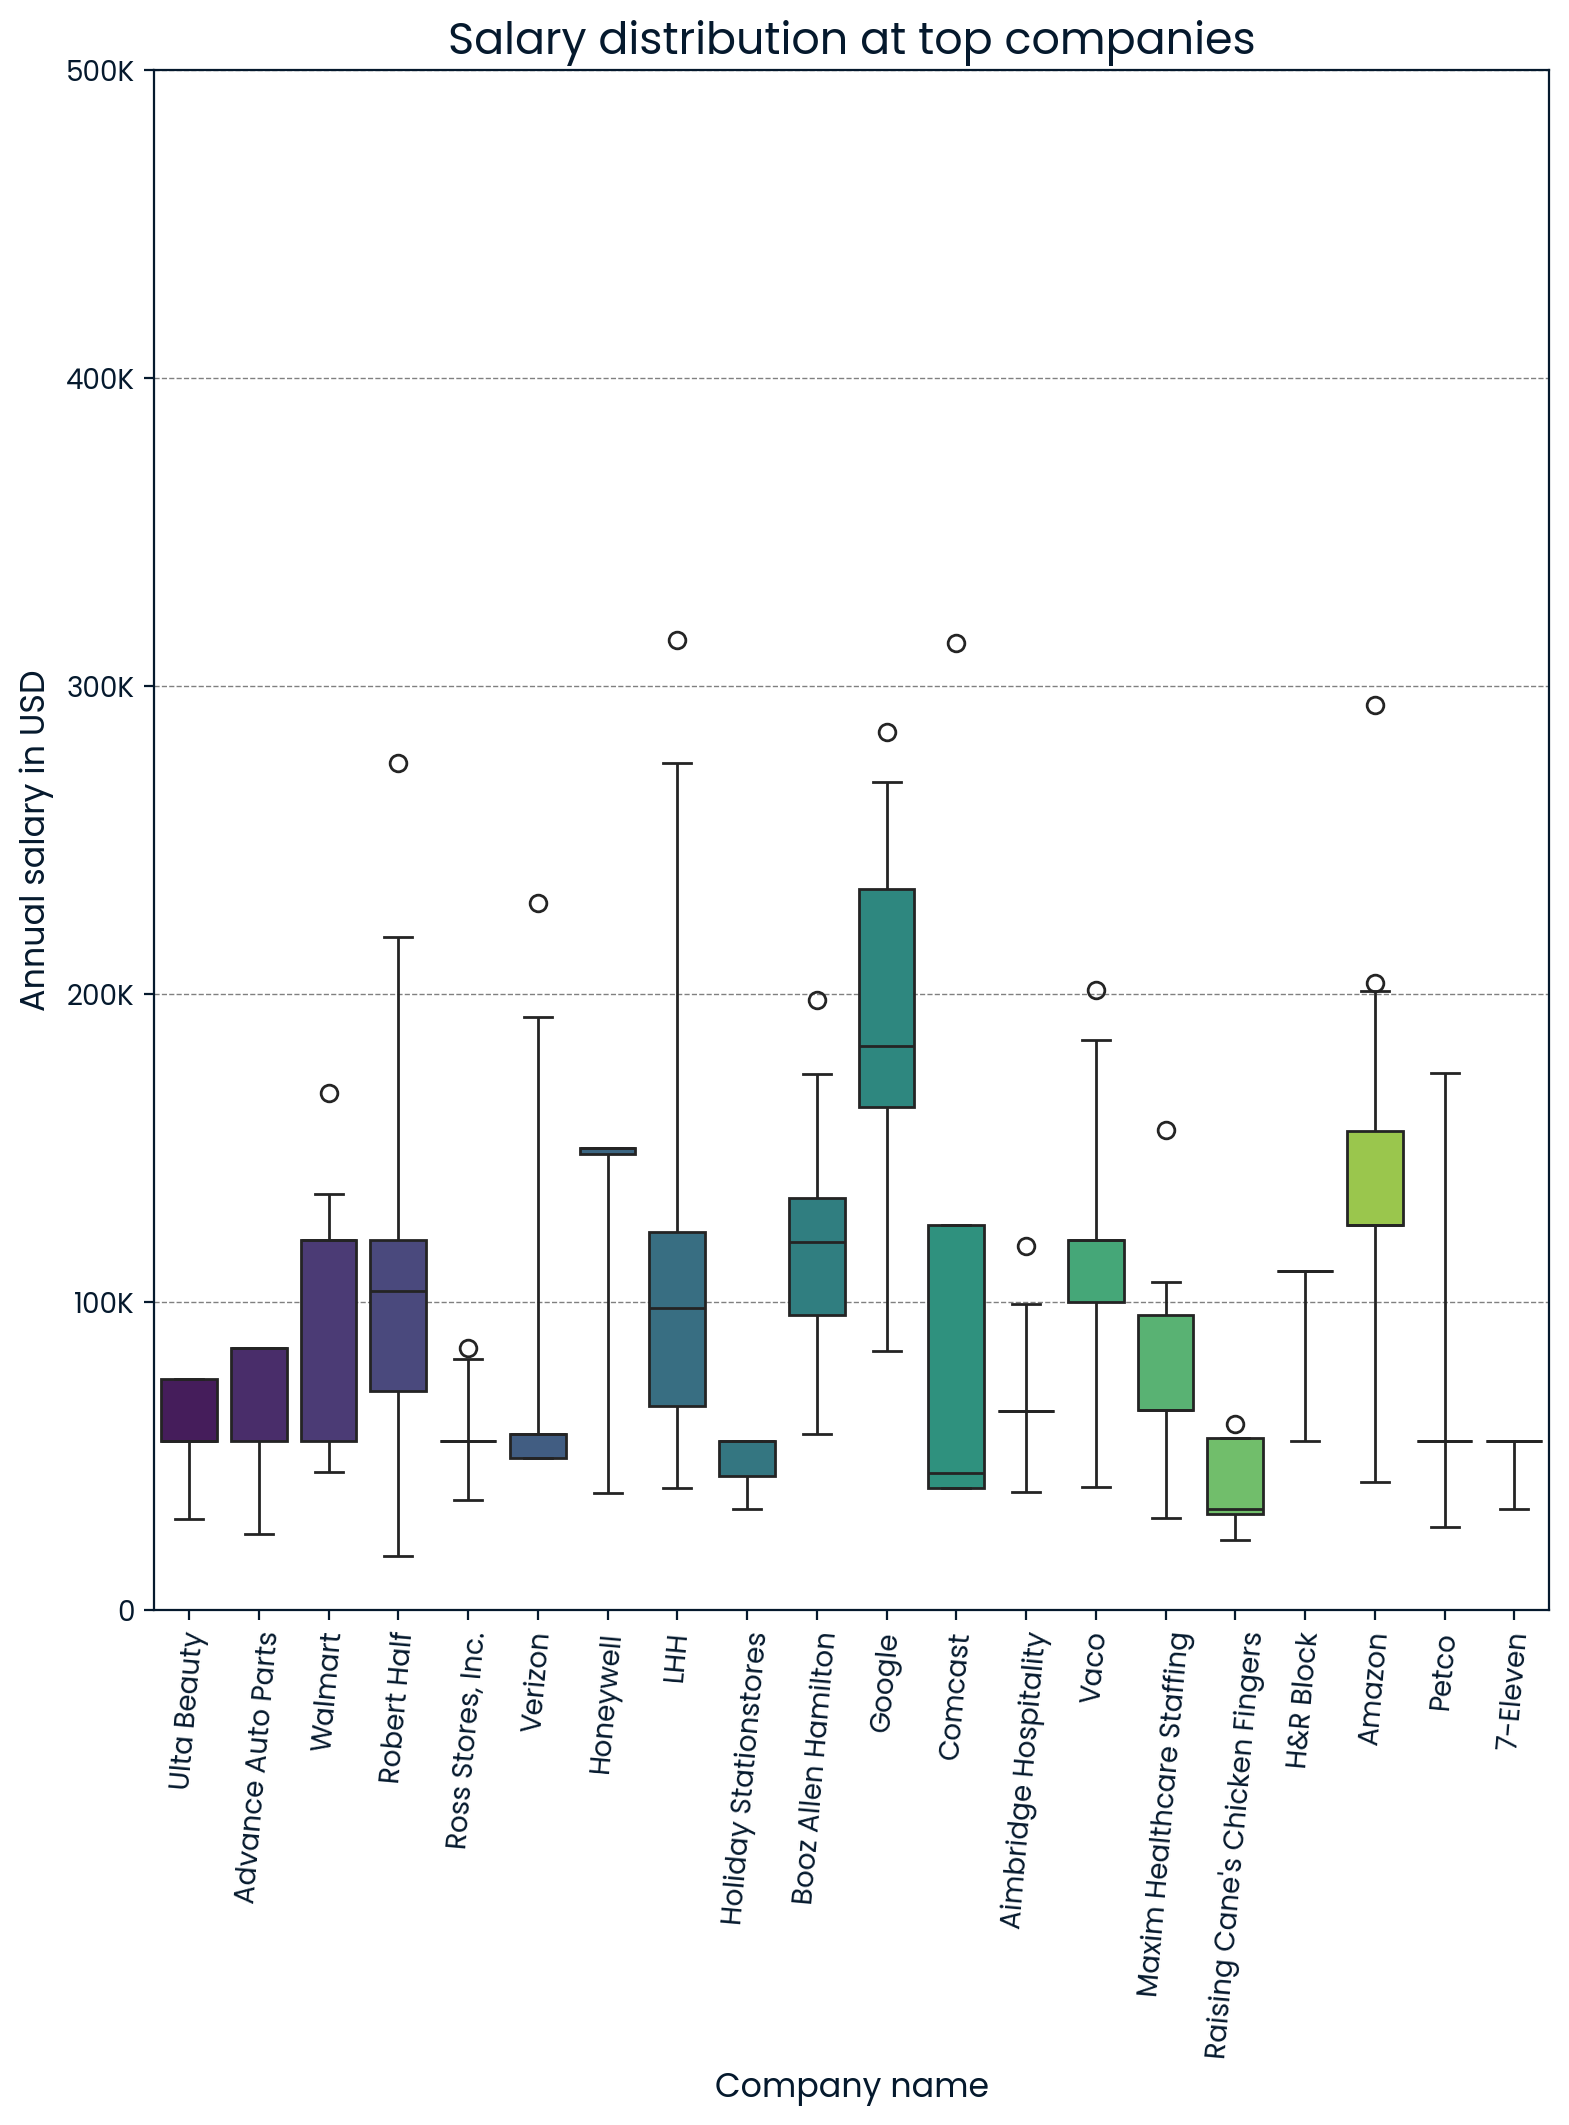

In [34]:
#Subset data to top 20 companies
largest_companies = database_aggregated.query('company_size==7')
top20_companies = largest_companies['name'].value_counts().head(20)
filtered_data_companies = largest_companies[largest_companies['name'].isin(top20_companies.index)]

plt.figure(figsize=(9, 10))
sns.boxplot(data=filtered_data_companies, x='name', y='unified_med_salary', whis=(0,99), showfliers=True, palette='viridis')
plt.title('Salary distribution at top companies', fontsize=16)
plt.xlabel('Company name', fontsize=12)
plt.xticks(rotation=85)
plt.yticks([0, 100000, 200000, 300000, 400000, 500000], ['0', '100K', '200K', '300K', '400K', '500K'])
plt.ylabel('Annual salary in USD', fontsize=12)
plt.grid(True, which="both", axis='y', ls="--", lw=0.5, c="gray")  # Add grid lines
plt.show()

As it stands, the tech giant **Google** is out of competition. Anyone lucky enough to get a job offer at such a distinguished company will hardly make less than 6 figures a year.    
Among other known companies, Amazon, Booz Allen Hamilton, and Robert Half also posted jobs with a median salary above 100,000 USD.

## What contributes to more applicants?

_The important note. The data contains the number of applications displayed in LinkedIn's Job Applicant Numbers. Overall it represents only a fraction of all possible ways to apply for a position. Even though some general tendencies can be uncovered, the results might not show the real and accurate situation in today's job market._

In today's competitive job market, countless factors influence employers' and candidates' preferences. Some jobs get thousands of applications in a few days, and some struggle to find anyone. Having data about the number of applications for each posting, in this chapter I find out what drives applicants and why.  

### Titles that get the most applications

Earlier in this project, we found out that most jobs have a hard time finding enough candidates (see The Number of Applications Distribution). On the chart below, the top 20 job titles that get the biggest average number of applicants are shown.

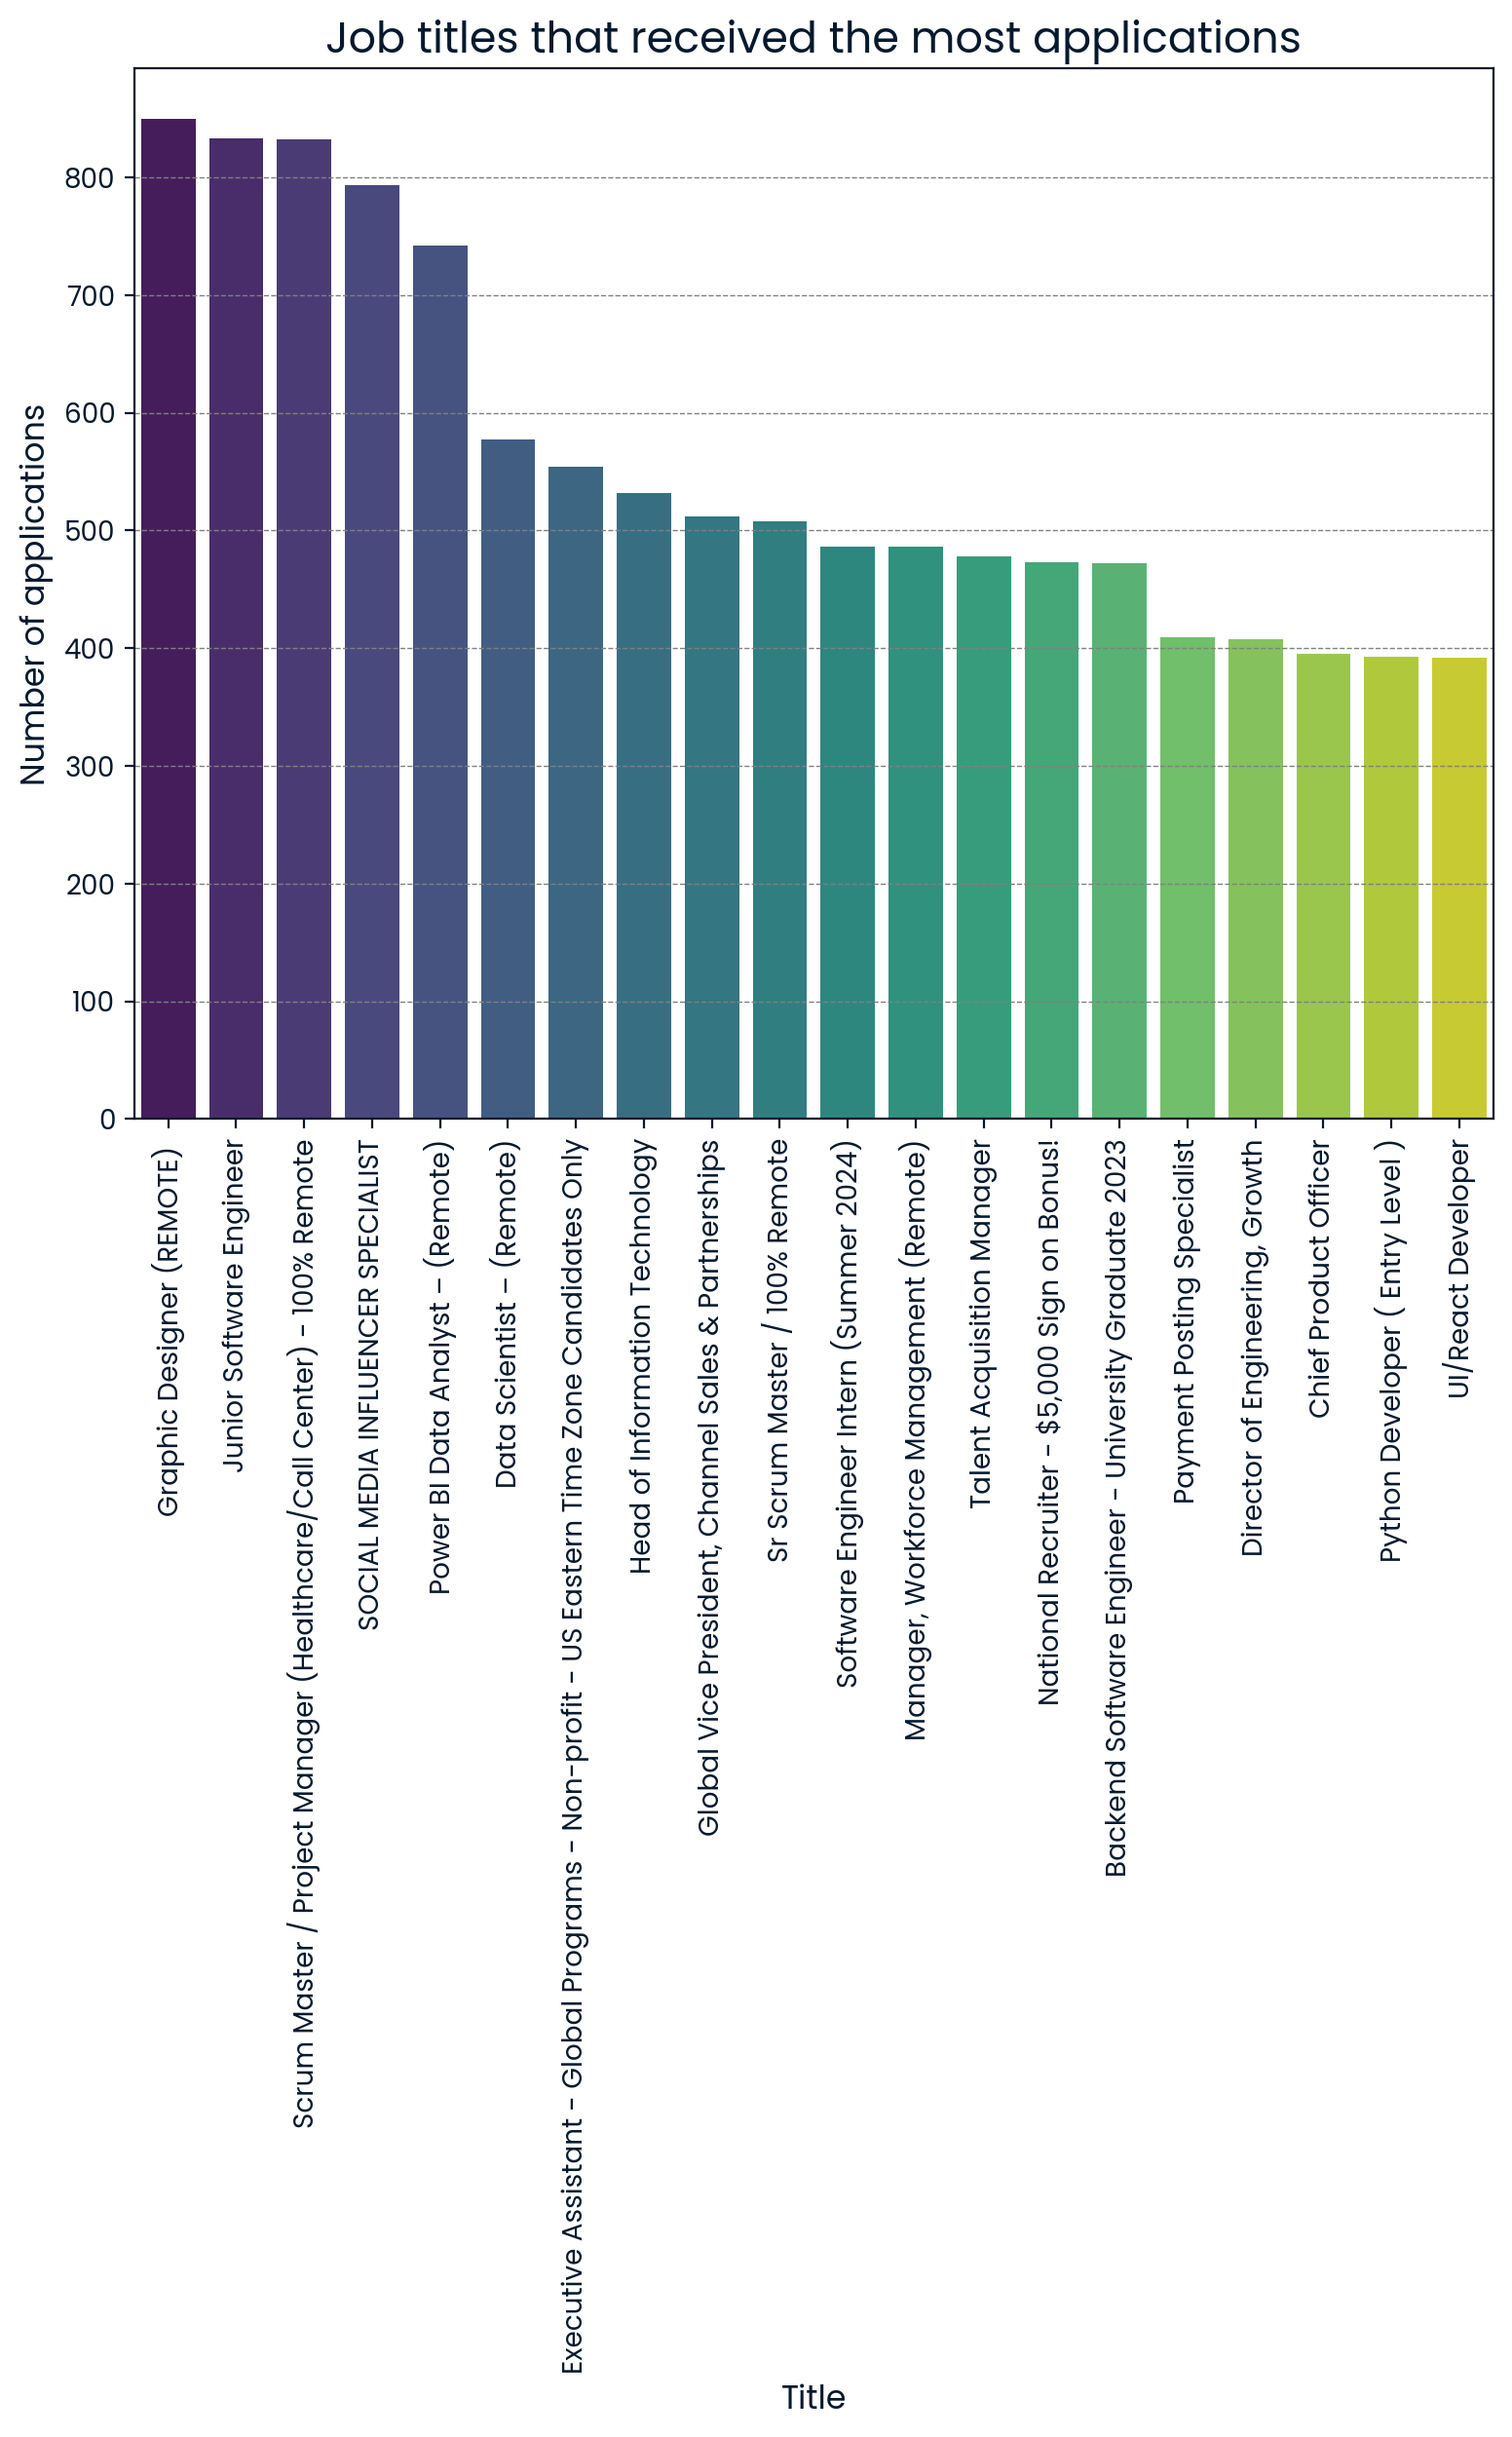

In [35]:
#Get top 20 titles with most applications
applies_title = database_aggregated.groupby('title')['applies'].mean().reset_index()
applies_title_sorted_top20 = applies_title.sort_values('applies', ascending=False).head(20)

plt.figure(figsize=(9, 7))
sns.barplot(x='title', y='applies', data=applies_title_sorted_top20, palette='viridis')
plt.title('Job titles that received the most applications', fontsize=16)
plt.xlabel('Title', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Number of applications', fontsize=12)
plt.grid(True, which="both", axis='y', ls="--", lw=0.5, c="gray")  # Add grid lines
plt.show()

As we see, titles are _'trendy'_ and _sound prestigious_. Some jobs contain the word _'Remote'_ right in the title. At first glance, most of these titles _don't require tons of relevant experience_, which might also be a reason for such numbers.    
Applying to these jobs, it's merely impossible to stand out. Even if you are 100% qualified, chances are your resume will never reach a human recruiter with such a competition.

### Are full-time jobs the most sought-after?

As already mentioned in this project, full-time positions account for more than 80% of all jobs posted. Being a source of guaranteed and consistent income with many company-provided benefits, do they have the biggest competition? Not really.

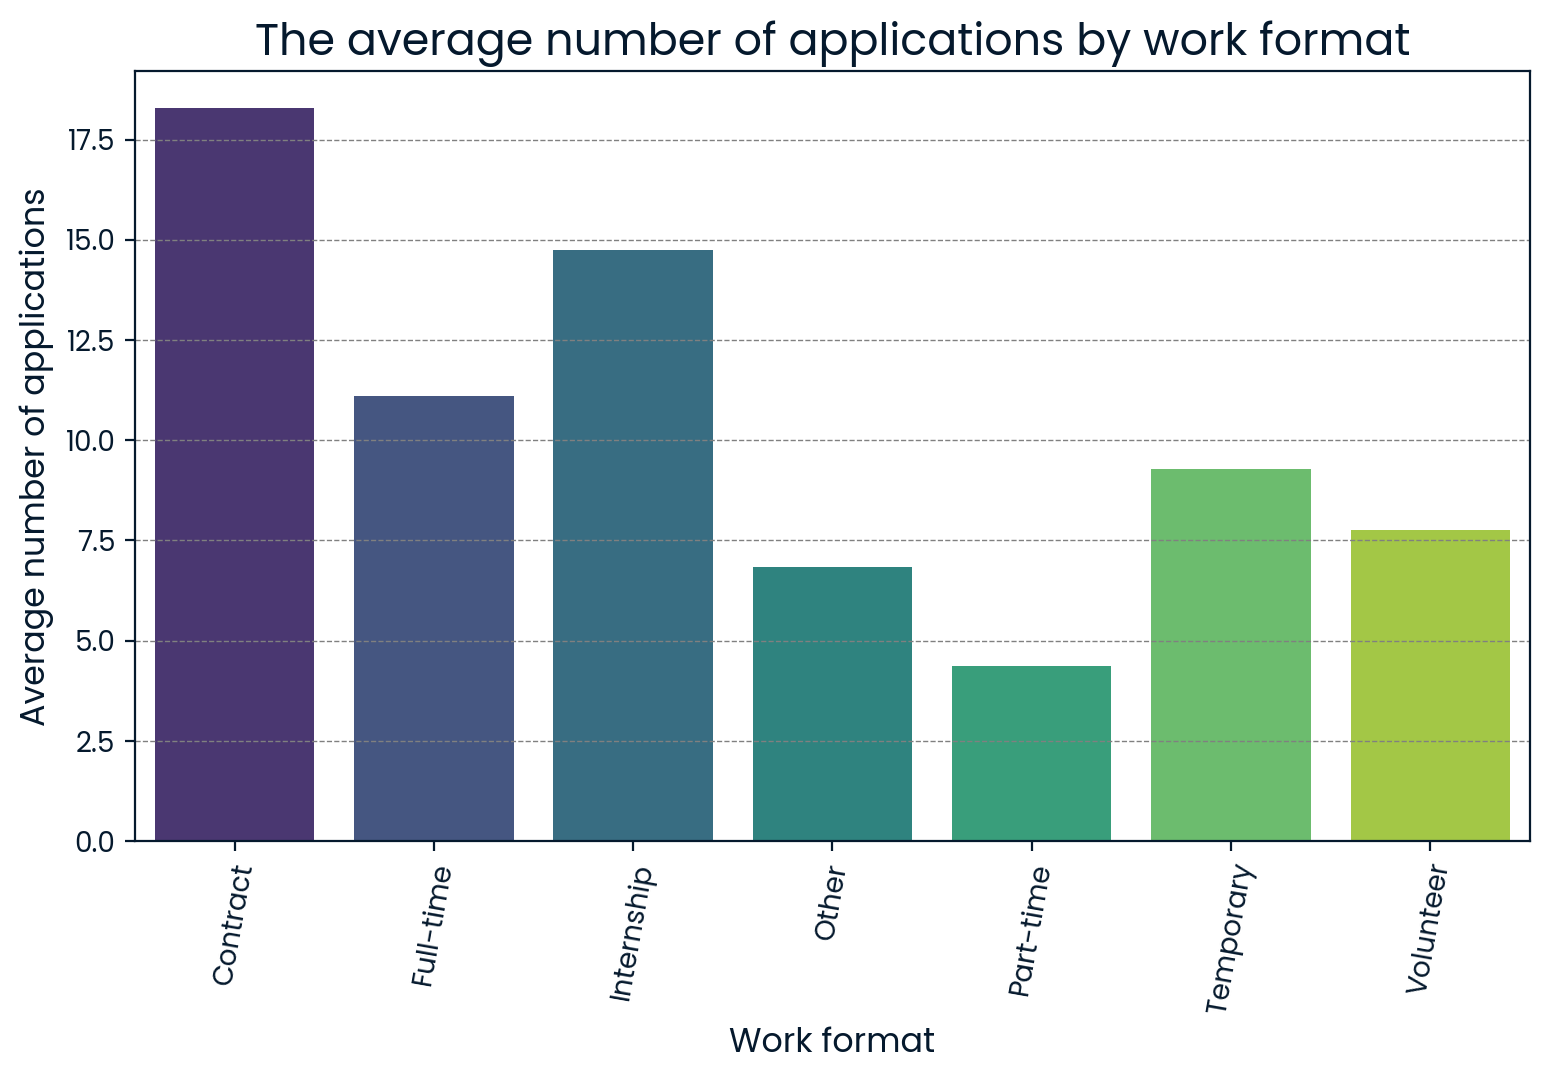

In [36]:
applies_work_type = database_aggregated.groupby('formatted_work_type')['applies'].mean()

plt.figure(figsize=(9, 5))
sns.barplot(x=applies_work_type.index, y=applies_work_type.values, palette='viridis')
plt.title('The average number of applications by work format', fontsize=16)
plt.xlabel('Work format', fontsize=12)
plt.xticks(rotation=80)
plt.ylabel('Average number of applications', fontsize=12)
plt.grid(True, which="both", axis='y', ls="--", lw=0.5, c="gray")  # Add grid lines
plt.show()

Each full-time position has 11 applicants on average, which is way behind the jobs on a contract basis (18 applications per job). This may be the result of a general tendency of skilled professionals to shift from being a full-time employee to a contractor with much more flexibility and autonomy [(source)](https://ellow.io/contract-work-vs-full-time-employment/).    
Jobs offering a 9-5 working schedule are even behind internships, which get almost 15 applicants on average each.    
The least popular among job seekers are part-time jobs, with a mean of 4.5 applications.

### Top locations where people apply for a job

As we saw in previous plots, big cities like New York have many jobs and high salaries. Do they also receive the most applications?

_Note. In the following chart, the top 20 locations based on the total number of jobs they posted, are compared (same as on the salary distribution boxplot)._

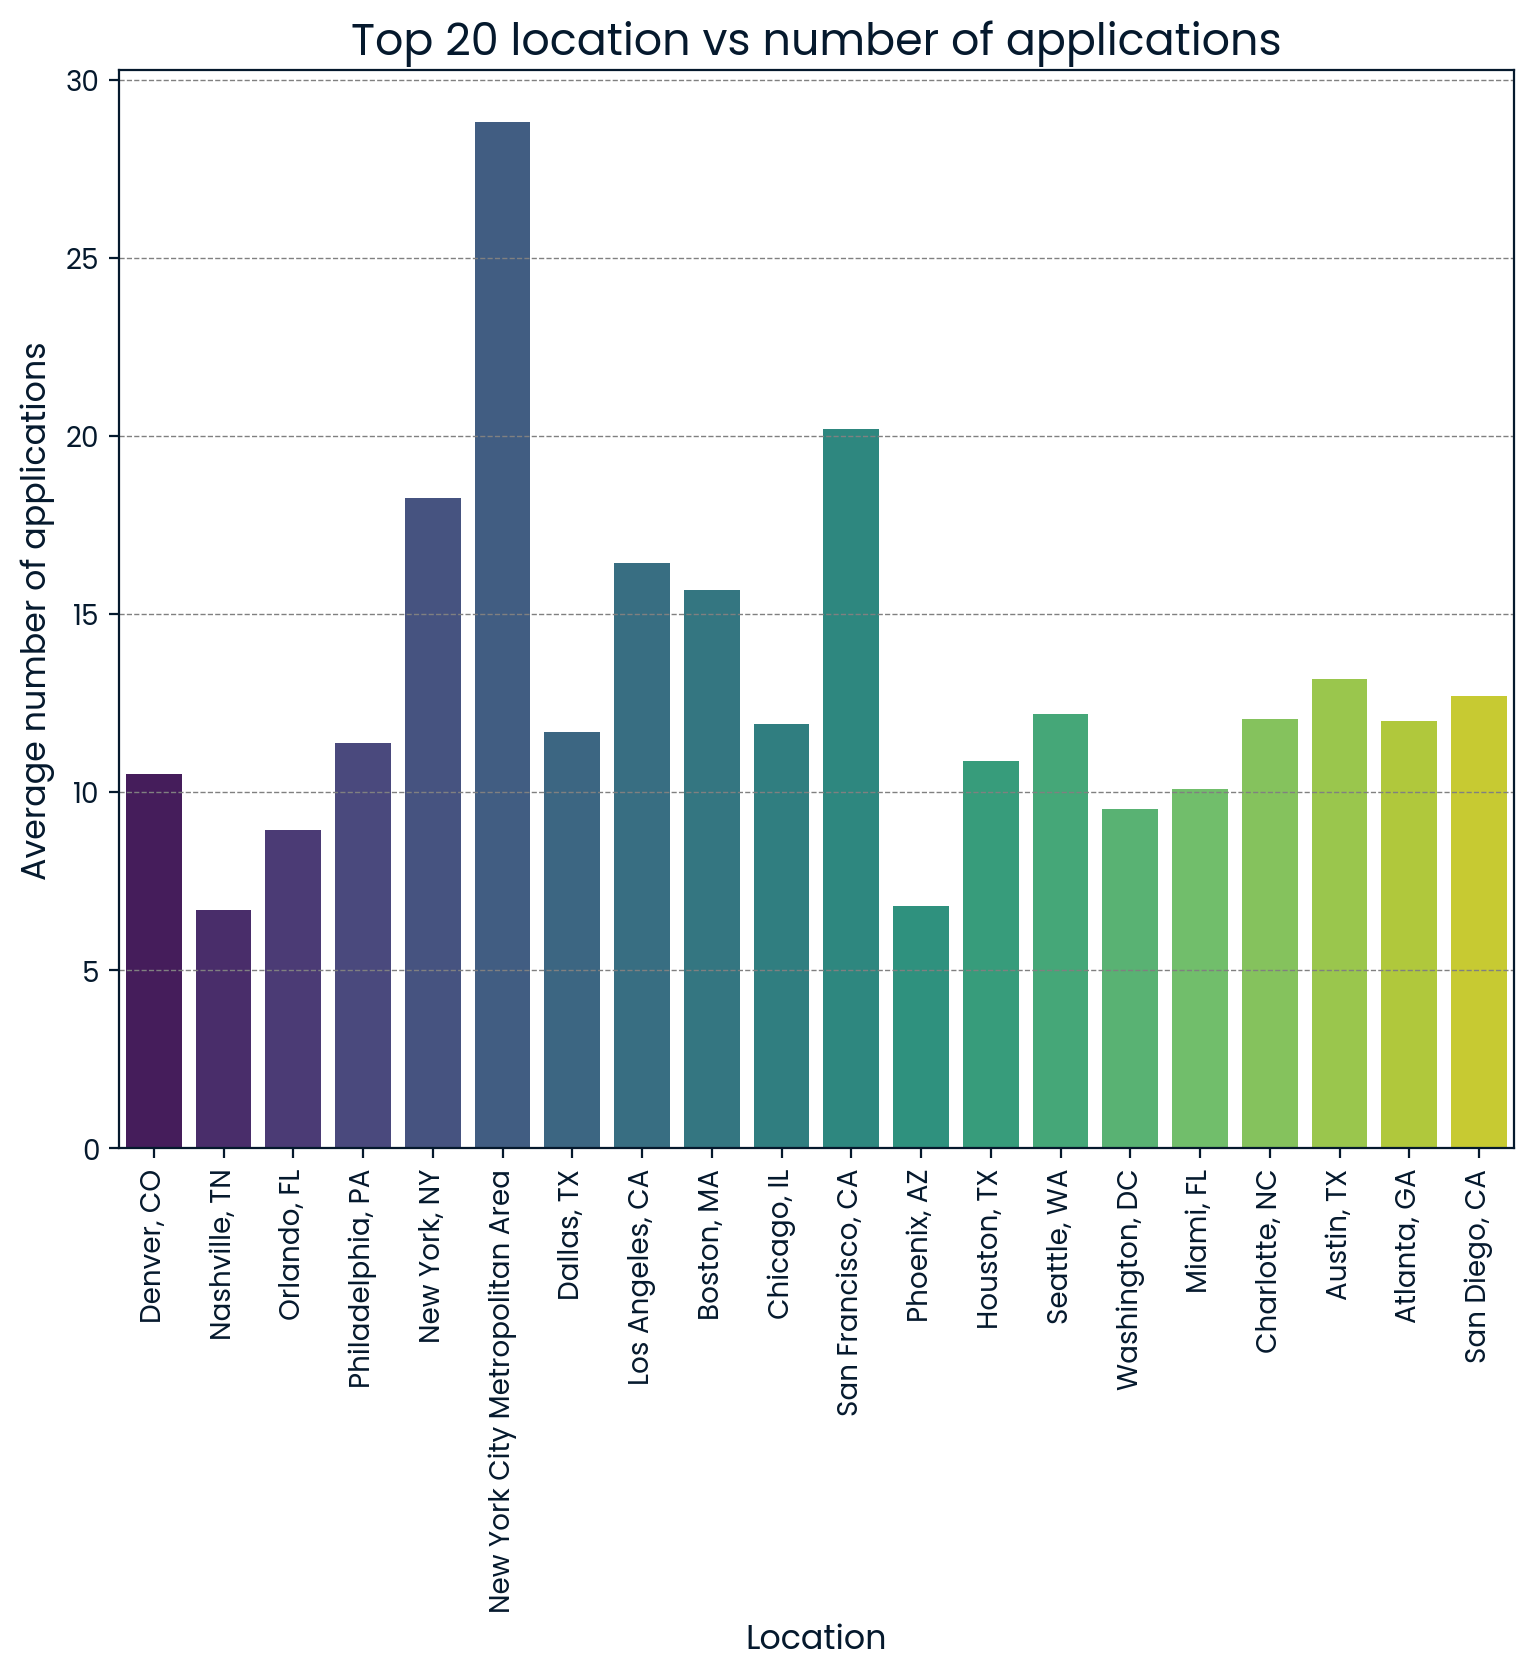

In [37]:
#Subset data to top 20 locaions
#filtered_data_locations

applies_location = database_aggregated.groupby('location')['applies'].mean().reset_index()
applies_location_sorted = applies_location.sort_values('applies', ascending=False)

plt.figure(figsize=(9, 7))
sns.barplot(x='location', y='applies', data=filtered_data_locations, ci=None, palette='viridis')
plt.title('Top 20 location vs number of applications', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Average number of applications', fontsize=12)
plt.grid(True, which="both", axis='y', ls="--", lw=0.5, c="gray")  # Add grid lines
plt.show()


Indeed, **New York City Metropolitan Area** and **San Francisco** have the highest average salaries and attract the most applicants. These locations get 28 and 20 applicants per job, respectively, no matter the industry and experience level.    
Within this top 20 list, the bottom 3 locations are Nashville, Phoenix (7 applications both), and Orlando (9 applications), which is 2 out of 3 match with the bottom 3 median salary locations (Orlando, Phoenix, Denver). Thus, _the average number of applicants per job in a particular big location is associated with the median salary in this location_.

### The 'remote' vs number of applicants

As discovered earlier, 5 out of the top 10 job titles that received the most applications (between 500 and 800 each!) put 'Remote' in the title. Does it make a difference in the bigger perspective?     
**14.4%** of all job postings **allow hybrid or remote work**. Let's see where people apply more.

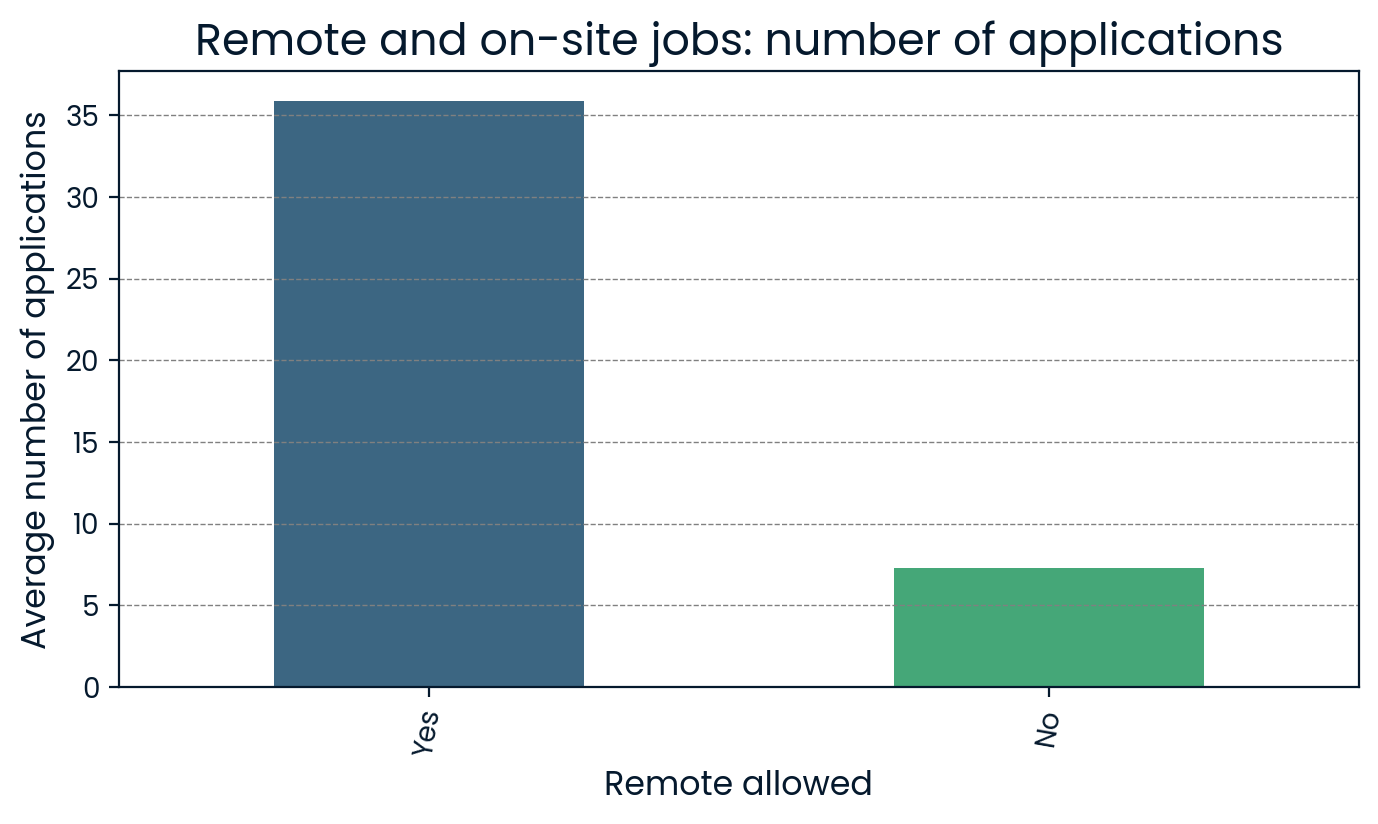

In [38]:
remote_applies = database_aggregated.groupby('remote_allowed')['applies'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='remote_allowed', y='applies', data=remote_applies, palette='viridis', width=0.5)
plt.title('Remote and on-site jobs: number of applications', fontsize=16)
plt.xticks(['Yes', 'nan'], ['Yes', 'No'], rotation=80)
plt.xlabel('Remote allowed', fontsize=12)
plt.ylabel('Average number of applications', fontsize=12)
plt.grid(True, which="both", axis='y', ls="--", lw=0.5, c="gray")  # Add grid lines
plt.show()

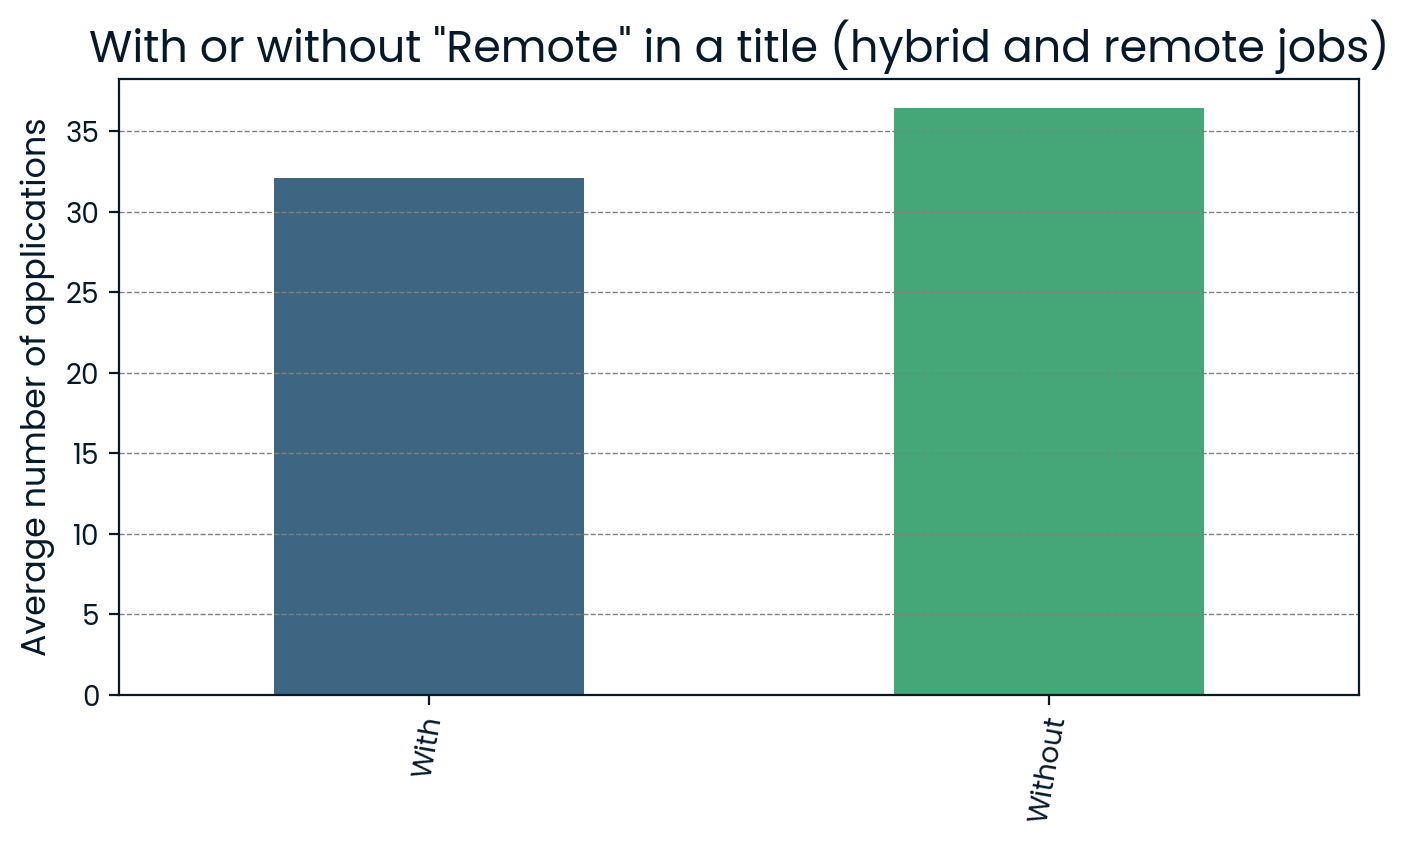

In [39]:
#Subset to all remote jobs
remote = database_aggregated[database_aggregated['remote_allowed']=='Yes']

#Subset to rows that contain 'Remote' in title
remote_in_title = remote['title'].str.contains('Remote', case=False, regex=False)
remote_title = remote[remote_in_title]
remote_title_mean = remote_title['applies'].mean()

#Subset to rows that don't contain 'Remote' in title
does_not_apply_remote = ~remote['title'].str.contains('Remote', case=False, regex=False)
non_remote_title = remote[does_not_apply_remote]
non_remote_title_mean = non_remote_title['applies'].mean()

data = [remote_title_mean, non_remote_title_mean]

plt.figure(figsize=(8, 4))
sns.barplot(data=data, palette='viridis', width=0.5)
plt.title('With or without "Remote" in a title (hybrid and remote jobs)', fontsize=16)
plt.xticks([0, 1], ['With', 'Without'], rotation=80)
plt.ylabel('Average number of applications', fontsize=12)
plt.grid(True, which="both", axis='y', ls="--", lw=0.5, c="gray")  # Add grid lines
plt.show()

Although remote or hybrid jobs have significantly bigger competition on average, putting 'Remote' in the job title doesn't make a difference.

_The fun fact. There are 72 jobs containing 'Remote' in the title, but doesn't allow work out of their office! Sounds weird doesn't it?_

**Does a simple application procedure mean more applications?**

Going through a complex multiple-step application can be daunting and time-consuming. The following chart shows the average number of applications depending on the application procedure: 

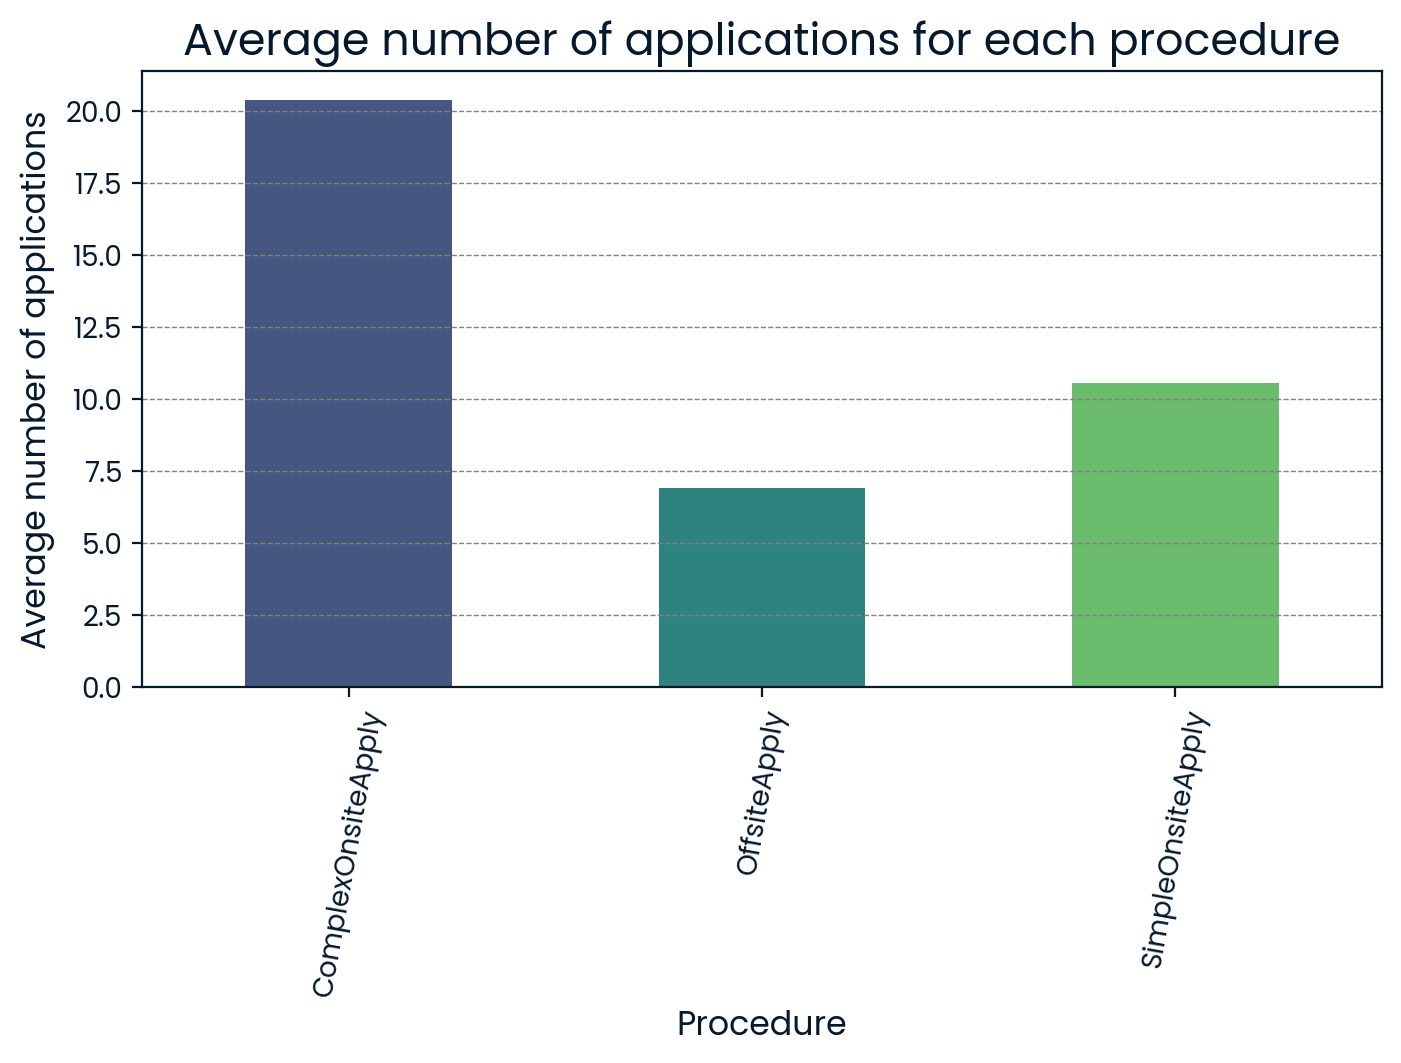

In [40]:
applies_procedure = database_aggregated.groupby('application_type')['applies'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='application_type', y='applies', data=applies_procedure, palette='viridis', width=0.5)
plt.title('Average number of applications for each procedure', fontsize=16)
plt.xticks(rotation=80)
plt.xlabel('Procedure', fontsize=12)
plt.ylabel('Average number of applications', fontsize=12)
plt.grid(True, which="both", axis='y', ls="--", lw=0.5, c="gray")  # Add grid lines
plt.show()

Jobs with complex applications tend to gather twice as many applicants as jobs with simple applications. Multiple-step procedures are more commonly used by big attractive companies, which might be a reason for a bigger interest.

### How does the experience level affect the competition?

Being on an entry, mid, or senior level, where it would be easier to find a job? After analyzing over 30,000 postings, here is what the data says:

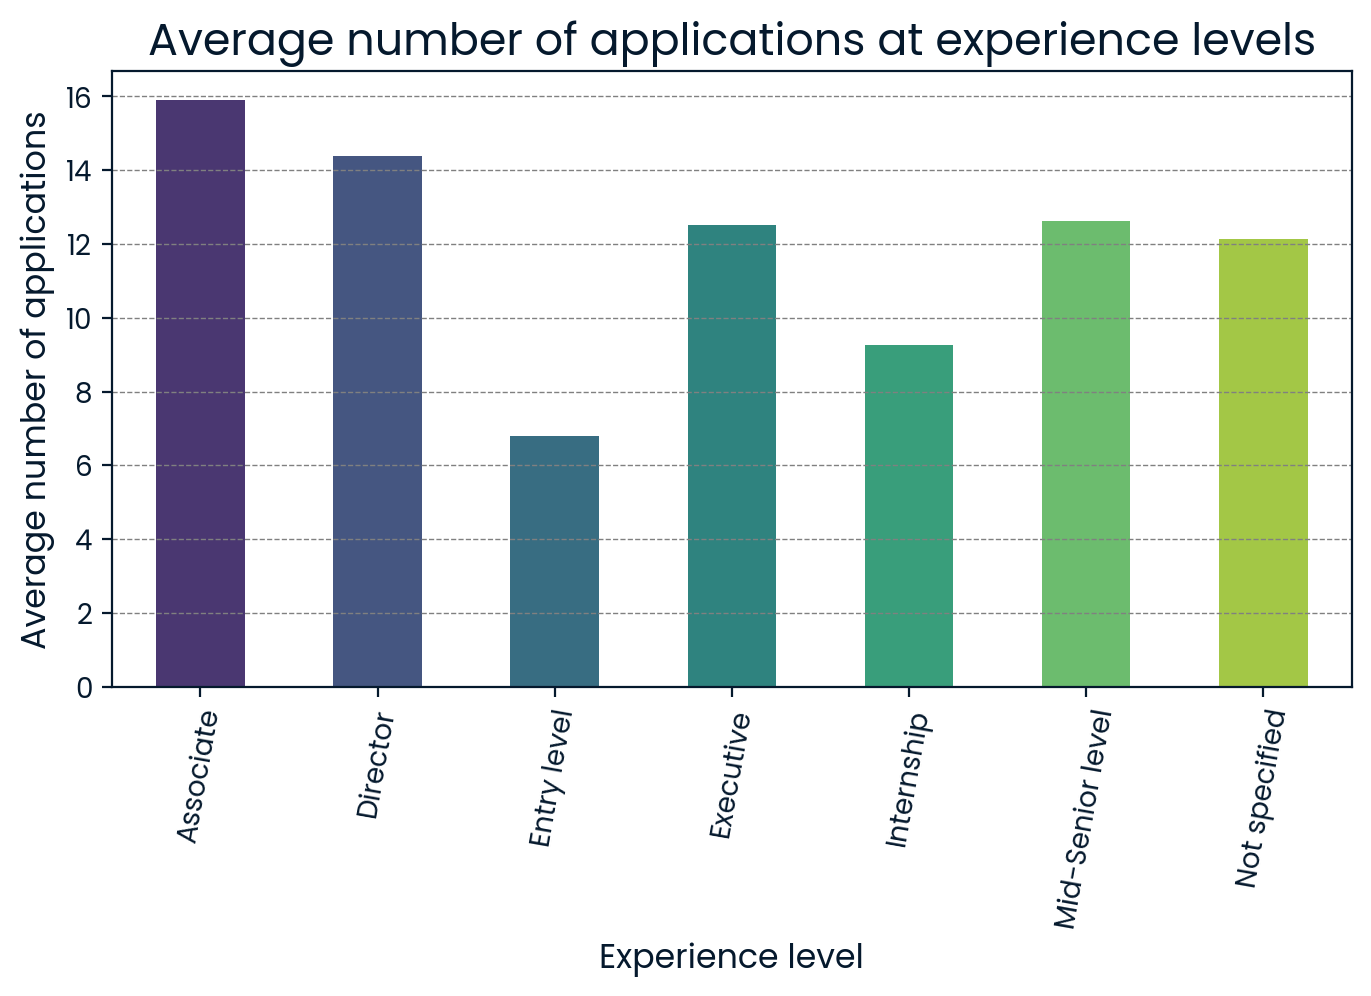

In [41]:
applies_experience = database_aggregated.groupby('formatted_experience_level')['applies'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='formatted_experience_level', y='applies', data=applies_experience, palette='viridis', width=0.5)
plt.title('Average number of applications at experience levels', fontsize=16)
plt.xticks(rotation=80)
plt.xlabel('Experience level', fontsize=12)
plt.ylabel('Average number of applications', fontsize=12)
plt.grid(True, which="both", axis='y', ls="--", lw=0.5, c="gray")  # Add grid lines
plt.show()

Even though it's being said that recent graduates and career changers have a challenging time finding a job [(source)](https://www.forbes.com/sites/jackkelly/2024/02/15/why-is-it-so-hard-for-recent-college-graduates-to-find-a-decent-job/), in this dataset entry-level jobs have the lowest application rate. However, jobs on the associate level tend to get considerably more candidates.

### Does the number of applications indicate the size of a company?

It's not a secret that big companies usually receive more applications than smaller ones. Does our data reflect the same?

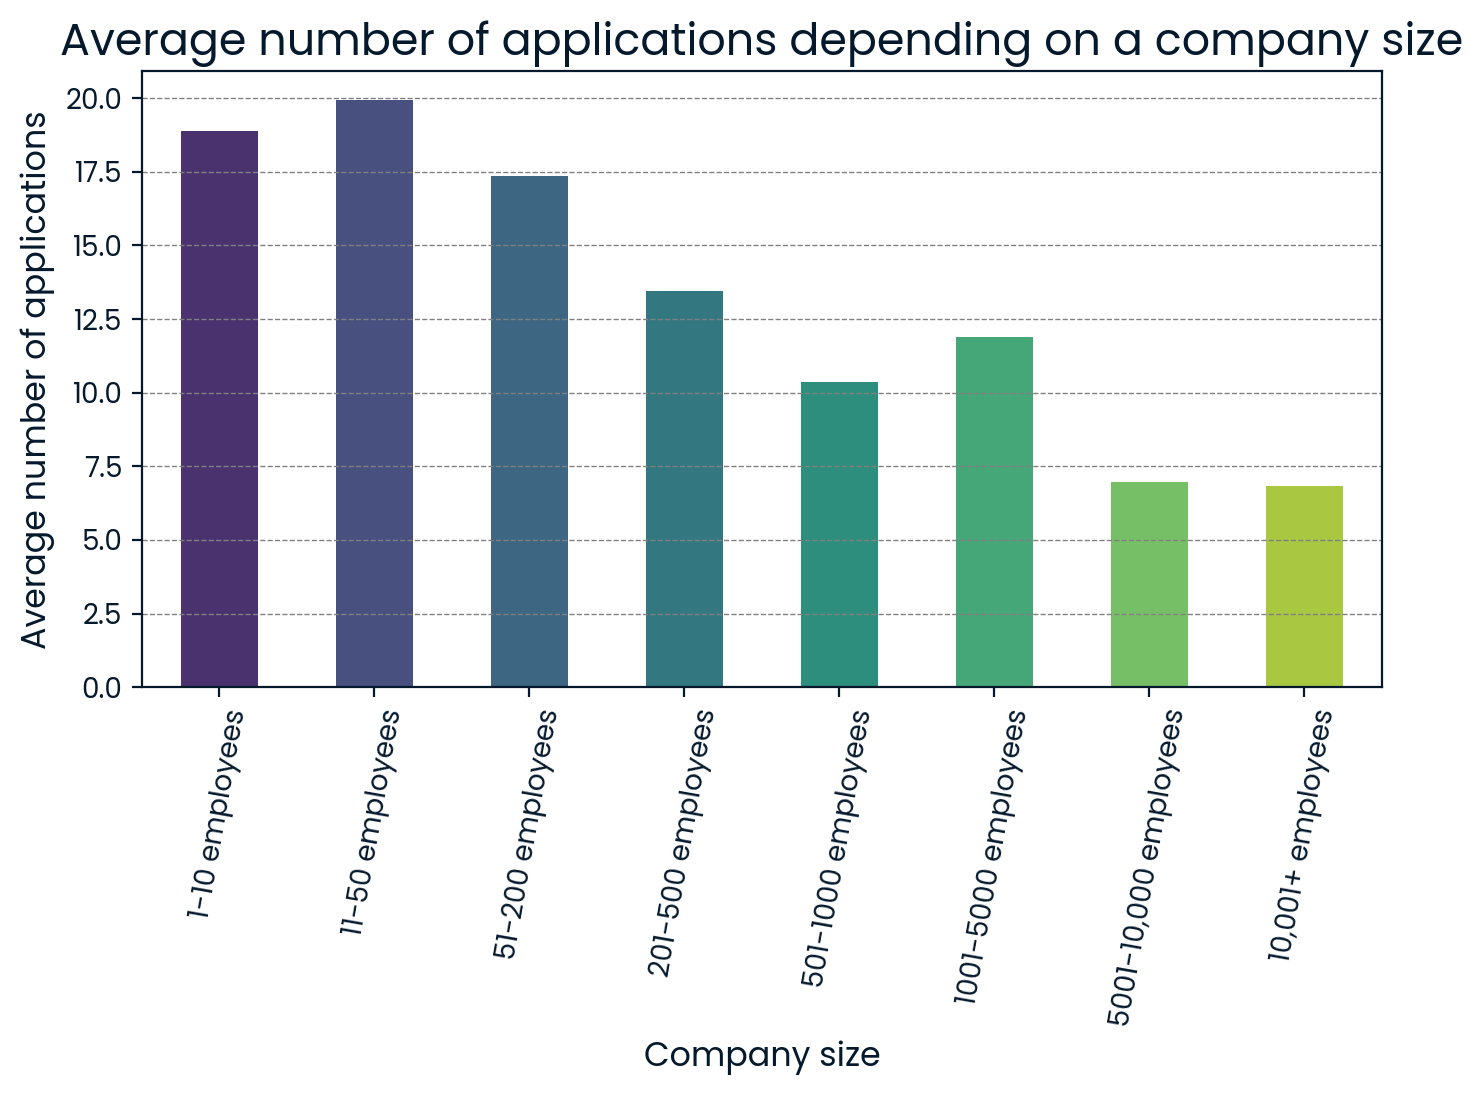

In [42]:
applies_company_size = database_aggregated.groupby('company_size')['applies'].mean()

# Map the values in company_size_counts index to their corresponding descriptions
applies_company_size.index = applies_company_size.index.map(company_size_description)

applies_company_size = applies_company_size.reset_index()
applies_company_size.columns = ['company_size', 'applies']

plt.figure(figsize=(8, 4))
sns.barplot(x='company_size', y='applies', data=applies_company_size, palette='viridis', width=0.5)
plt.title('Average number of applications depending on a company size', fontsize=16)
plt.xticks(rotation=80)
plt.xlabel('Company size', fontsize=12)
plt.ylabel('Average number of applications', fontsize=12)
plt.grid(True, which="both", axis='y', ls="--", lw=0.5, c="gray")  # Add grid lines
plt.show()

In this dataset, jobs posted by smaller companies get more applications. This is contrary to our assumption. A wealth of factors may be contributing to this, such as but not limited to: jobs published by smaller companies are 'simpler' with more people able to carry out, the same jobs duplicated for different locations, some portion of data was deleted during cleaning, scam postings, etc.

# Key Findings

**General observations**

- 4 out of 5 most common job titles involve various roles in Sales, making it the greatest in-demand industry;
- Approximately just 25% of jobs are suitable for recent graduates and career changers (incl. internships and entry-level positions);
- Small companies with 50 employees or less posted only 11% of jobs;
- Roughly half of all jobs received 3 or fewer applications through LinkedIn, 75% - 8 or fewer candidates applied;
- The biggest number of job postings are located in the New York City Metropolitan Area - 1,042 openings (3.37% of jobs).

**Salaries**

- Legal, Advertising, and Product Management, ranging from 149,800 to 127,400 USD per year, are the best-paid occupations on average;
- The top 5 highest paid jobs all come from the tech industry;
- San Francisco median salary of 125,000 USD is the highest, followed by New York City (112,500 USD) and Seattle (109,872.5 USD).

**Competition level**

- In big locations, the average number of applications is associated with the median salary;
- The job markets in New York City and San Francisco have the biggest competition, with 28 and 20 applications per job, respectively;
- Remote jobs attract 5 times as many applicants as on-site positions;
- Counterintuitively, a complex application procedure leads to twice as many candidates as simple applications;
- Associate positions have the highest rate of applicants - 16 per position.

# Recommendations

**If you are a job seeker**:

- Small companies post few jobs on LinkedIn, but **networking and direct contact** can significantly boost your chances of being hired; 
- Prioritize applying to **smaller companies with on-site positions** if you are a recent graduate or changing careers to face less competition;
- When considering a move to a **location with higher wages**, be prepared for **increased competition** for the same positions;
- **Lowering your job standards** can enhance your chances of landing a position quickly if **immediate employment** is a priority;
- For higher earnings, consider transitioning to careers in **Legal**, **Advertising**, or **Product Management**, as they are among the best-paid occupations;

**If you are hiring**:

- Try to **create more internships and entry-level positions** to attract recent graduates and career changers, addressing their 25% job suitability rate;
- Focus recruitment efforts on **sales positions**, given their high demand and popularity among the most common job titles;
- Ensure job postings are **clear and concise** to attract more applicants, as more than a half job openings struggle to get enough candidates;
- Although small companies post only 11% of jobs, consider **partnering** with them to search for high-quality candidates;
- Emphasize **competitive salary offerings**, especially in high-demand locations like San Francisco and New York City, to attract top talent and remain competitive.

_Thank you for reading till the very end! Your feedback and sharing are greatly appreciated._